# **[GD-10] TransformerÎ°ú Î≤àÏó≠Í∏∞ ÎßåÎì§Í∏∞**
---

# **üóº Î™©Ï∞®**
Step 0. ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞  
Step 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞  
Step 2. Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú Î∞è ÌÜ†ÌÅ∞Ìôî  
Step 3. Î™®Îç∏ ÏÑ§Í≥Ñ  
Step 4. ÌõàÎ†®ÌïòÍ∏∞  
Step 5. Î™®Îç∏ ÌïôÏäµÌïòÍ∏∞  
üåû ÌöåÍ≥†

# **Step 0. ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞**
---

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import re
import os
import io
import time
import random

import seaborn # Attention ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥ ÌïÑÏöî!

# print(tensorflow.__version__)
# print(numpy.__version__)
# print(matplotlib.__version__)

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'
 
fontpath = '/content/drive/MyDrive/AIFFEL/[GD-10]/transformer/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)

print("Ïäù=3")

Ïäù=3


# **Step 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞**
---

In [4]:
kor_path = '/content/drive/MyDrive/AIFFEL/[GD-10]/transformer/korean-english-park.train.tar/korean-english-park.train.ko'
eng_path = '/content/drive/MyDrive/AIFFEL/[GD-10]/transformer/korean-english-park.train.tar/korean-english-park.train.en'

In [5]:
with open(kor_path, "r") as f:
    kor_raw = f.read().splitlines()

print("Korean Data Size:", len(kor_raw))
print("Korean Example:")

for sen in kor_raw[0:10]: print(">>", sen)

Korean Data Size: 94123
Korean Example:
>> Í∞úÏù∏Ïö© Ïª¥Ìì®ÌÑ∞ ÏÇ¨Ïö©Ïùò ÏÉÅÎãπ Î∂ÄÎ∂ÑÏùÄ "Ïù¥Í≤ÉÎ≥¥Îã§ Îõ∞Ïñ¥ÎÇ† Ïàò ÏûàÎäêÎÉê?"
>> Î™®Îì† Í¥ëÎßàÏö∞Ïä§ÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄ Î°ú Ïù¥ Í¥ëÎßàÏö∞Ïä§ÎèÑ Ï±ÖÏÉÅ ÏúÑÏóê ÎÜìÎäî ÎßàÏö∞Ïä§ Ìå®ÎìúÎ•º ÌïÑÏöîÎ°ú ÌïòÏßÄ ÏïäÎäîÎã§.
>> Í∑∏Îü¨ÎÇò Ïù¥Í≤ÉÏùÄ ÎòêÌïú Ï±ÖÏÉÅÎèÑ ÌïÑÏöîÎ°ú ÌïòÏßÄ ÏïäÎäîÎã§.
>> 79.95Îã¨Îü¨ÌïòÎäî Ïù¥ ÏµúÏ≤®Îã® Î¨¥ÏÑ† Í¥ëÎßàÏö∞Ïä§Îäî ÌóàÍ≥µÏóêÏÑú ÌåîÎ™©, Ìåî, Í∑∏Ïô∏Ïóê Ïñ¥Îñ§ Î∂ÄÎ∂ÑÏù¥Îì† Í∑∏ ÏõÄÏßÅÏûÑÏóêÎî∞Îùº Ïª§ÏÑúÏùò ÏõÄÏßÅÏûÑÏùÑ Ï°∞Ï†àÌïòÎäî ÌöåÏ†Ñ Ïö¥Îèô ÏÑºÏÑúÎ•º ÏÇ¨Ïö©ÌïòÍ≥† ÏûàÎã§.
>> Ï†ïÎ≥¥ Í¥ÄÎ¶¨Îì§ÏùÄ ÎèôÎÇ® ÏïÑÏãúÏïÑÏóêÏÑúÏùò ÏÑ†Î∞ïÎì§Ïóê ÎåÄÌïú ÎßéÏùÄ (ÌÖåÎü¨) Í≥ÑÌöçÎì§Ïù¥ Ïã§Ìå®Î°ú ÎèåÏïÑÍ∞îÏùåÏùÑ Î∞ùÌòîÏúºÎ©∞, ÏÑ∏Í≥Ñ Ìï¥ÏÉÅ ÍµêÏó≠ÎüâÏùò Í±∞Ïùò 3Î∂ÑÏùò 1ÏùÑ Ïö¥ÏÜ°ÌïòÎäî Ï¢ÅÏùÄ Ìï¥Î°úÏù∏ ÎßêÎùºÏπ¥ Ìï¥ÌòëÏù¥ ÌÖåÎü¨ Í≥µÍ≤©ÏùÑ ÎãπÌïòÍ∏∞ ÏâΩÎã§Í≥† Í≤ΩÍ≥†ÌïòÍ≥† ÏûàÎã§.
>> Ïù¥ ÏßÄÏó≠Ïóê ÏûàÎäî ÎØ∏Íµ≠ ÏÑ†Î∞ïÍ≥º ÏÉÅÏóÖÏö© ÏÑ†Î∞ïÎì§Ïóê ÎåÄÌïú ÏïåÏπ¥ÏóêÎã§Ïùò (ÌÖåÎü¨) ÏãúÎèÑ Ï§ë Ïó¨Îü¨ Í±¥Ïù¥ Ïã§Ìå®ÌñàÎã§Îäî Í≤ÉÏùÑ ÏïåÍ≤å Îêú ÌõÑÏ

In [6]:
with open(eng_path, "r") as f:
    eng_raw = f.read().splitlines()

print("English Data Size:", len(eng_raw))
print("English Example:")

for sen in eng_raw[0:10]: print(">>", sen)

English Data Size: 94123
English Example:
>> Much of personal computing is about "can you top this?"
>> so a mention a few weeks ago about a rechargeable wireless optical mouse brought in another rechargeable, wireless mouse.
>> Like all optical mice, But it also doesn't need a desk.
>> uses gyroscopic sensors to control the cursor movement as you move your wrist, arm, whatever through the air.
>> Intelligence officials have revealed a spate of foiled plots on ships in Southeast Asia and are warning that a narrow stretch of water carrying almost one third of the world's maritime trade is vulnerable to a terror attack.
>> After learning of several foiled al Qaeda attempts on U.S. and commercial ships in the area, experts are warning that the terror network still wants to cripple the global economy, the world's economic jugular vein in Southeast Asia is at risk.
>> Caffeine can help increase reaction time and improve performance for military servicemen who must perform complex tasks or w

# **Step 2. Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú Î∞è ÌÜ†ÌÅ∞Ìôî**
---

## **2.1 Ï§ëÎ≥µ Ï†úÍ±∞**
- Îç∞Ïù¥ÌÑ∞Ïùò Î≥ëÎ†¨ ÏåçÏù¥ ÌùêÌä∏Îü¨ÏßÄÏßÄ ÏïäÍ≤å Ï§ëÎ≥µ Ï†úÍ±∞ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú `zip Ìï®Ïàò`Î•º ÏÇ¨Ïö©ÌïúÎã§.
- Ï§ëÎ≥µÏùÑ Ï†úÍ±∞ÌïòÍ∏∞ ÏúÑÌï¥ `set`ÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ ÌòïÌÉúÎ•º Î≥ÄÍ≤ΩÌïòÏòÄÎã§.

In [7]:
def clean_corpus(kor_path, eng_path):
    with open(kor_path, "r") as f: kor = f.read().splitlines()
    with open(eng_path, "r") as f: eng = f.read().splitlines()
    assert len(kor) == len(eng)

    set_data = set(zip(kor, eng))
    cleaned_corpus = list(set_data)

    return cleaned_corpus

cleaned_corpus = clean_corpus(kor_path, eng_path)

In [8]:
cleaned_corpus[1]

('Ïù¥ÎûÄÏùò ÏòÅÍµ≠Íµ∞ ÎÇòÌè¨ ÏÇ¨Í±¥ÏúºÎ°ú Ïù∏Ìïú Í∏¥Ïû• Í≥†Ï°∞Î°ú Í±∏ÌîÑ ÏßÄÏó≠ ÏÑùÏú†Í≥µÍ∏âÏóê ÎåÄÌïú Ïö∞Î†§Í∞Ä ÏÉÅÏäπ, 29Ïùº Ïú†Í∞ÄÎäî 6Í∞úÏõîÎûò ÏµúÍ≥†ÏàòÏ§ÄÏùÑ Í∏∞Î°ùÌñàÎã§.',
 'Oil held near its highest close in over six months on Thursday as traders weighed rising risk to Gulf supplies from mounting tension between Iran and the West.')

In [9]:
print(len(cleaned_corpus))

78968


## **2.2 Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú**

In [10]:
def preprocess_sentence(sentence, s_token=False, e_token=False):
    sentence = sentence.lower().strip()

    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)   # \1 : ÏïûÏùò Ï≤´ Î≤àÏß∏ Í∑∏Î£πÏùÑ ÎúªÌï® / Ï≤´ Î≤àÏß∏ Í∑∏Î£πÏóê ÏûàÎäî Î¨∏Ïûê Ïïû Îí§Î°ú Í≥µÎ∞± Ï∂îÍ∞Ä
    sentence = re.sub(r'[" "]+', " ", sentence)     # Ïó¨Îü¨ Í∞úÏùò Í≥µÎ∞±ÏùÑ ÌïòÎÇòÏùò Í≥µÎ∞±ÏúºÎ°ú Î≥ÄÍ≤Ω
    sentence = re.sub(r"[^a-zA-Z„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£?.!,]+", " ", sentence)   # ÏòÅÏñ¥, ÌïúÍ∏Ä, ?.!, Ï†úÏô∏Ìïú Í≤ÉÎì§ÏùÑ Í≥µÎ∞±ÏúºÎ°ú Î≥ÄÍ≤Ω

    sentence = sentence.strip()   # Î¨∏ÏûêÏó¥ Ïñë ÎÅùÏóê ÏûàÎäî Í≥µÎ∞± Ï†úÍ±∞

    return sentence

## **2.3 ÌÜ†ÌÅ∞Ìôî**
ÌÜ†ÌÅ∞ÌôîÏóêÎäî `Sentencepiece`Î•º ÌôúÏö©Ìï¥Î≥¥Ïûê.

In [11]:
pip install sentencepiece

ÌäπÏàò ÌÜ†ÌÅ∞Ïùò Ïù∏Îç±Ïä§Î•º `<PAD>` : 0 / `<BOS>` : 1 / `<EOS>` : 2 / `<UNK>` : 3 ÏôÄ Í∞ôÏù¥ ÏßÄÏ†ïÌïúÎã§.  
Í∑∏Î¶¨Í≥† sentencepiece Î™®Îç∏ÏùÑ ÌôúÏö©ÌïòÏó¨ ÌÜ†ÌÅ∞ÌôîÌïòÎäî `generator_tokenizer`Î•º Ï†ïÏùòÌï¥Î≥¥Ïûê.

In [12]:
import sentencepiece as spm
import os

# SentencepieceÎ•º ÌôúÏö©ÌïòÏó¨ ÌïôÏäµÌïú tokenizerÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
def generate_tokenizer(corpus,
                        vocab_size,
                        lang="ko",
                        pad_id=0,
                        bos_id=1,
                        eos_id=2,
                        unk_id=3):
    # ÌïôÏäµ ÌõÑ Ï†ÄÏû•Îêú model ÌååÏùº Í≤ΩÎ°ú
    temp_file = '/content/drive/MyDrive/AIFFEL/[GD-10]/temp_{lang}_txt'

    with open(temp_file, 'w') as f:
        for row in corpus:
            f.write(str(row) + '\n')

    spm.SentencePieceTrainer.Train(
    '--input={} --vocab_size={} --model_prefix=spm_{} --pad_id={} --bos_id={} --eos_id={} --unk_id={}'.format(temp_file, vocab_size, lang, pad_id, bos_id, eos_id, unk_id)    
)
    
    tokenizer = spm.SentencePieceProcessor()
    tokenizer.Load('spm_{}.model'.format(lang))

    return tokenizer

ÏúÑÏóêÏÑú Ï†ïÏùòÌïú `preprocess_sentence`Î•º ÌôúÏö©ÌïòÏó¨ ÌïúÍ∏Ä ÎßêÎ≠âÏπò `kor_corpus`ÏôÄ ÏòÅÎ¨∏ ÎßêÎ≠âÏπò `eng_corpus`Î•º Î∂ÑÎ¶¨ÌïòÏó¨ Ï†ïÏ†úÌï¥Î≥¥Ïûê.

In [13]:
kor_corpus = []
eng_corpus = []

for kor, eng in cleaned_corpus:
    tmp_kor = preprocess_sentence(kor)
    tmp_eng = preprocess_sentence(eng, s_token = True, e_token = True)

    kor_corpus.append(tmp_kor)
    eng_corpus.append(tmp_eng)
    
print(len(kor_corpus))
print(len(eng_corpus))

78968
78968


Îã®Ïñ¥ÏÇ¨Ï†ÑÏùò ÌÅ¨Í∏∞Î•º `20,000`ÏúºÎ°ú ÏßÄÏ†ïÌïòÏó¨ ÏúÑÏóêÏÑú Ï†ïÏùòÌïú `generate_tokenizer`Î°ú ÌÜ†ÌÅ∞ÌôîÌï¥Î≥¥Ïûê.

In [14]:
SRC_VOCAB_SIZE = 20000
TGT_VOCAB_SIZE = 20000

kor_tokenizer = generate_tokenizer(kor_corpus, SRC_VOCAB_SIZE, "ko")
eng_tokenizer = generate_tokenizer(eng_corpus, TGT_VOCAB_SIZE, "en")
eng_tokenizer.set_encode_extra_options("bos:eos")

True

## **2.4 ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞ ÏôÑÏÑ±**
ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÎ•º ÌôúÏö©ÌïòÏó¨ ÌÜ†ÌÅ∞Ïùò Í∏∏Ïù¥Í∞Ä 50 Ïù¥ÌïòÏù∏ Îç∞Ïù¥ÌÑ∞ÎßåÏùÑ ÏÑ†Î≥ÑÌïòÏó¨ corpusÎ•º Í∞ÅÍ∞Å Íµ¨Ï∂ïÌïòÍ≥† ÌÖêÏÑúÎ°ú Î≥ÄÌôòÏãúÏºúÎ≥¥Ïûê.

In [15]:
from tqdm.notebook import tqdm    # Process Í≥ºÏ†ïÏùÑ Î≥¥Í∏∞ ÏúÑÌï®

src_corpus = []
tgt_corpus = []

assert len(kor_corpus) == len(eng_corpus)

# ÌÜ†ÌÅ∞Ïùò Í∏∏Ïù¥Í∞Ä 50 Ïù¥ÌïòÏù∏ Î¨∏Ïû•Îßå ÎÇ®ÍπÅÎãàÎã§. 
for idx in tqdm(range(len(kor_corpus))):
    src = kor_tokenizer.EncodeAsIds(kor_corpus[idx])
    tgt = eng_tokenizer.EncodeAsIds(eng_corpus[idx])

    if len(src) <= 50 and len(tgt) <= 50:
        src_corpus.append(src)
        tgt_corpus.append(tgt)

# Ìå®Îî©Ï≤òÎ¶¨Î•º ÏôÑÎ£åÌïòÏó¨ ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞Î•º ÏôÑÏÑ±Ìï©ÎãàÎã§. 
enc_train = tf.keras.preprocessing.sequence.pad_sequences(src_corpus, padding='post')
dec_train = tf.keras.preprocessing.sequence.pad_sequences(tgt_corpus, padding='post')

  0%|          | 0/78968 [00:00<?, ?it/s]

# **Step 3. Î™®Îç∏ ÏÑ§Í≥Ñ**
---

## **3.1 ÎÇ¥Î∂Ä Î™®Îìà Íµ¨ÌòÑÌïòÍ∏∞**
Ïù¥Î≤à ÌîÑÎ°úÏ†ùÌä∏Îäî Ìä∏ÎûúÏä§Ìè¨Î®∏Î•º ÏôÑÏÑ±ÌïòÎäî Îç∞Ïóê ÌïÑÏöîÌïú Î™®ÎìàÏùÑ ÌïòÎÇòÌïòÎÇò ÎßåÎì† ÌõÑ Ï°∞Î¶ΩÌïòÏó¨ ÏôÑÏÑ±ÌïòÎäî Î∞©ÏãùÏúºÎ°ú ÏßÑÌñâÌï¥Î≥¥Ïûê.

### **3.1.1 Positional Encoding**

In [16]:
def positional_encoding(pos, d_model):
    def cal_angle(position, i):
        return position / np.power(10000, int(i) / d_model)

    def get_posi_angle_vec(position):
        return [cal_angle(position, i) for i in range(d_model)]

    sinusoid_table = np.array([get_posi_angle_vec(pos_i) for pos_i in range(pos)])
    sinusoid_table[:, 0::2] = np.sin(sinusoid_table[:, 0::2])
    sinusoid_table[:, 1::2] = np.cos(sinusoid_table[:, 1::2])
    return sinusoid_table

print("Ïäù=3")

Ïäù=3


### **3.1.2 Multi-Head Attention**
Multi-Head AttentionÏùÄ Ïó¨Îü¨ Í∞úÏùò ÏÑúÎ∏å Î™®ÎìàÏùÑ Í≤∞Ìï©ÌïòÏó¨ ÏôÑÏÑ±ÎêúÎã§.

EmbeddingÎêú ÏûÖÎ†•ÏùÑ Head ÏàòÎ°ú Î∂ÑÌï†ÌïòÎäî `split_heads()`, Î∂ÑÌï†Îêú ÏûÖÎ†•ÏúºÎ°úÎ∂ÄÌÑ∞ Attention Í∞íÏùÑ Íµ¨ÌïòÎäî `scaled_dot_product_attention()`, Ïó∞ÏÇ∞Ïù¥ Ï¢ÖÎ£åÎêòÍ≥† Î∂ÑÌï†Îêú HeadÎ•º Îã§Ïãú ÌïòÎÇòÎ°ú Í≤∞Ìï©ÌïòÎäî `combine_heads()` Îì± Ïó¨Îü¨ Í∞úÏùò ÏÑúÎ∏å Î™®ÎìàÏù¥ ÏûàÎã§.  
Ïù¥ ÏÑúÎ∏å Î™®ÎìàÎì§ÏùÑ `MultiHeadAttention` ÌÅ¥ÎûòÏä§Î•º Ï†ïÏùòÌïòÏó¨ Î™®Îëê Ìè¨Ìï®ÏãúÌÇ¨ Í≤ÉÏù¥Îã§.  


In [17]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model
            
        self.depth = d_model // self.num_heads
            
        self.W_q = tf.keras.layers.Dense(d_model)
        self.W_k = tf.keras.layers.Dense(d_model)
        self.W_v = tf.keras.layers.Dense(d_model)
            
        self.linear = tf.keras.layers.Dense(d_model)

    def scaled_dot_product_attention(self, Q, K, V, mask):      # Î∂ÑÌï†Îêú ÏûÖÎ†•ÏúºÎ°úÎ∂ÄÌÑ∞ Attention Í∞íÏùÑ Íµ¨Ìï®
        d_k = tf.cast(K.shape[-1], tf.float32)
        QK = tf.matmul(Q, K, transpose_b=True)

        scaled_qk = QK / tf.math.sqrt(d_k)

        if mask is not None: scaled_qk += (mask * -1e9)     # ÏÉùÏÑ±Îêú ÎßàÏä§ÌÅ¨Î•º Ï≤òÎ¶¨

        attentions = tf.nn.softmax(scaled_qk, axis=-1)
        out = tf.matmul(attentions, V)

        return out, attentions
            

    def split_heads(self, x):         # EmbeddingÎêú ÏûÖÎ†•ÏùÑ Head ÏàòÎ°ú Î∂ÑÌï†
        batch_size = x.shape[0]
        split_x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        split_x = tf.transpose(split_x, perm=[0, 2, 1, 3])

        return split_x

    def combine_heads(self, x):     # Ïó∞ÏÇ∞Ïù¥ Ï¢ÖÎ£åÎêòÍ≥† Î∂ÑÌï†Îêú HeadÎ•º Îã§Ïãú ÌïòÎÇòÎ°ú Í≤∞Ìï©
        batch_size = x.shape[0]
        combined_x = tf.transpose(x, perm=[0, 2, 1, 3])
        combined_x = tf.reshape(combined_x, (batch_size, -1, self.d_model))

        return combined_x

        
    def call(self, Q, K, V, mask):
        WQ = self.W_q(Q)
        WK = self.W_k(K)
        WV = self.W_v(V)
        
        WQ_splits = self.split_heads(WQ)
        WK_splits = self.split_heads(WK)
        WV_splits = self.split_heads(WV)
            
        out, attention_weights = self.scaled_dot_product_attention(
            WQ_splits, WK_splits, WV_splits, mask)
    				        
        out = self.combine_heads(out)
        out = self.linear(out)
                
        return out, attention_weights

### **3.1.3 Position-wise Feed-Forward Network**
`[batch_size x length x d_model]`Ïùò ÏûÖÎ†•ÏùÑ Î∞õÏïÑ `w_1`Ïù¥ 2048Ï∞®ÏõêÏúºÎ°ú Îß§ÌïëÌïòÍ≥† ÌôúÏÑ±Ìï®Ïàò ReLUÎ•º Ï†ÅÏö©Ìïú ÌõÑ, Îã§Ïãú `w_2`Î•º ÌÜµÌï¥ 512Ï∞®ÏõêÏúºÎ°ú ÎêòÎèåÎ¶¨Îäî Í≥ºÏ†ïÏù¥Îã§

In [18]:
class PoswiseFeedForwardNet(tf.keras.layers.Layer):
    def __init__(self, d_model, d_ff):
        super(PoswiseFeedForwardNet, self).__init__()
        self.w_1 = tf.keras.layers.Dense(d_ff, activation='relu')
        self.w_2 = tf.keras.layers.Dense(d_model)

    def call(self, x):
        out = self.w_1(x)
        out = self.w_2(out)
            
        return out

print("Ïäù=3")

Ïäù=3


## **3.2 Î™®Îìà Ï°∞Î¶ΩÌïòÍ∏∞**
ÎßàÏπò ÌÖêÏÑúÌîåÎ°úÏö∞Ïùò Dense Î†àÏù¥Ïñ¥Î•º ÏÇ¨Ïö©ÌïòÎìØÏù¥ EncoderLayer, DecoderLayerÎ•º Ïì∏ Ïàò ÏûàÍ≤å `tf.keras.layers.Layer` ÌÅ¥ÎûòÏä§Î•º ÏÉÅÏÜçÎ∞õÏïÑ Î†àÏù¥Ïñ¥ ÌÅ¥ÎûòÏä§Î°ú Ï†ïÏùòÌï¥Ï£ºÎ©¥ ÎêúÎã§.  
(ÏßÅÏ†ÑÏóê Ï†ïÏùòÌïú MultiHeadAttention Î†àÏù¥Ïñ¥ÏôÄ Í∞ôÏùÄ Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥ ÏïÑÎûòÏôÄ Í∞ôÏùÄ Ïö©Î≤ïÏúºÎ°ú Ìä∏ÎûúÏä§Ìè¨Î®∏ Î†àÏù¥Ïñ¥Î•º ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎã§.)


### **3.2.1 Encoder Î†àÏù¥Ïñ¥ Íµ¨ÌòÑÌïòÍ∏∞**

In [19]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, n_heads, d_ff, dropout):
        super(EncoderLayer, self).__init__()

        self.enc_self_attn = MultiHeadAttention(d_model, n_heads)
        self.ffn = PoswiseFeedForwardNet(d_model, d_ff)

        self.norm_1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout = tf.keras.layers.Dropout(dropout)
        
    def call(self, x, mask):

        """
        Multi-Head Attention
        """
        residual = x
        out = self.norm_1(x)
        out, enc_attn = self.enc_self_attn(out, out, out, mask)
        out = self.dropout(out)
        out += residual
        
        """
        Position-Wise Feed Forward Network
        """
        residual = out
        out = self.norm_2(out)
        out = self.ffn(out)
        out = self.dropout(out)
        out += residual
        
        return out, enc_attn

print("Ïäù=3")

Ïäù=3


### **3.2.3 Decoder Î†àÏù¥Ïñ¥ Íµ¨ÌòÑÌïòÍ∏∞**
DecoderÏóêÏÑúÎäî Îëê Î≤àÏùò AttentionÏù¥ ÏßÑÌñâÎêòÎØÄÎ°ú Î∞òÌôòÎêòÎäî AttentionÎèÑ 2Í∞úÏù¥Îã§.

In [20]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(DecoderLayer, self).__init__()

        self.dec_self_attn = MultiHeadAttention(d_model, num_heads)
        self.enc_dec_attn = MultiHeadAttention(d_model, num_heads)

        self.ffn = PoswiseFeedForwardNet(d_model, d_ff)

        self.norm_1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout = tf.keras.layers.Dropout(dropout)
    
    def call(self, x, enc_out, causality_mask, padding_mask):

        """
        Masked Multi-Head Attention
        """
        residual = x
        out = self.norm_1(x)
        out, dec_attn = self.dec_self_attn(out, out, out, padding_mask)
        out = self.dropout(out)
        out += residual

        """
        Multi-Head Attention
        """
        residual = out
        out = self.norm_2(out)
        out, dec_enc_attn = self.enc_dec_attn(out, enc_out, enc_out, causality_mask)
        out = self.dropout(out)
        out += residual
        
        """
        Position-Wise Feed Forward Network
        """
        residual = out
        out = self.norm_3(out)
        out = self.ffn(out)
        out = self.dropout(out)
        out += residual

        return out, dec_attn, dec_enc_attn

### **3.2.4 Encoder Ï†ïÏùò**

In [21]:
class Encoder(tf.keras.Model):
    def __init__(self,
                 n_layers,
                 d_model,
                 n_heads,
                 d_ff,
                 dropout):
        super(Encoder, self).__init__()
        self.n_layers = n_layers
        self.enc_layers = [EncoderLayer(d_model, n_heads, d_ff, dropout) 
                        for _ in range(n_layers)]
        
    def call(self, x, mask):
        out = x
    
        enc_attns = list()
        for i in range(self.n_layers):
            out, enc_attn = self.enc_layers[i](out, mask)
            enc_attns.append(enc_attn)
        
        return out, enc_attns

print("Ïäù=3")

Ïäù=3


### **3.2.5 Decoder Ï†ïÏùò**

In [22]:
class Decoder(tf.keras.Model):
    def __init__(self,
                 n_layers,
                 d_model,
                 n_heads,
                 d_ff,
                 dropout):
        super(Decoder, self).__init__()
        self.n_layers = n_layers
        self.dec_layers = [DecoderLayer(d_model, n_heads, d_ff, dropout) 
                            for _ in range(n_layers)]
                            
                            
    def call(self, x, enc_out, causality_mask, padding_mask):
        out = x
    
        dec_attns = list()
        dec_enc_attns = list()
        for i in range(self.n_layers):
            out, dec_attn, dec_enc_attn = \
            self.dec_layers[i](out, enc_out, causality_mask, padding_mask)

            dec_attns.append(dec_attn)
            dec_enc_attns.append(dec_enc_attn)

        return out, dec_attns, dec_enc_attns

print("Ïäù=3")

Ïäù=3


### **3.2.6 Transformer ÏôÑÏÑ±ÌïòÍ∏∞**
Ï†ïÏùòÎêú EncoderÏôÄ DecoderÎ•º Í∞ÄÏßÄÍ≥† ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú `Transformer`Î•º ÏôÑÏÑ±Ìï¥Î≥¥Ïûê.

In [23]:
class Transformer(tf.keras.Model):
    def __init__(self,
                    n_layers,
                    d_model,
                    n_heads,
                    d_ff,
                    src_vocab_size,
                    tgt_vocab_size,
                    pos_len,
                    dropout=0.2,
                    shared=True):
        super(Transformer, self).__init__()
        self.d_model = tf.cast(d_model, tf.float32)

        self.enc_emb = tf.keras.layers.Embedding(src_vocab_size, d_model)
        self.dec_emb = tf.keras.layers.Embedding(tgt_vocab_size, d_model)

        self.pos_encoding = positional_encoding(pos_len, d_model)
        self.dropout = tf.keras.layers.Dropout(dropout)

        self.encoder = Encoder(n_layers, d_model, n_heads, d_ff, dropout)
        self.decoder = Decoder(n_layers, d_model, n_heads, d_ff, dropout)

        self.fc = tf.keras.layers.Dense(tgt_vocab_size)

        self.shared = shared

        if shared: self.fc.set_weights(tf.transpose(self.dec_emb.weights))

    def embedding(self, emb, x):
        seq_len = x.shape[1]
        out = emb(x)

        if self.shared: out *= tf.math.sqrt(self.d_model)

        out += self.pos_encoding[np.newaxis, ...][:, :seq_len, :]
        out = self.dropout(out)

        return out

        
    def call(self, enc_in, dec_in, enc_mask, causality_mask, dec_mask):
        enc_in = self.embedding(self.enc_emb, enc_in)
        dec_in = self.embedding(self.dec_emb, dec_in)

        enc_out, enc_attns = self.encoder(enc_in, enc_mask)
        
        dec_out, dec_attns, dec_enc_attns = \
        self.decoder(dec_in, enc_out, causality_mask, dec_mask)
        
        logits = self.fc(dec_out)
        
        return logits, enc_attns, dec_attns, dec_enc_attns

## **3.3 Î™®Îç∏ Î∞ñÏùò Ï°∞Î†•Ïûê**

### **3.3.1 Masking**

In [24]:
import numpy as np
import tensorflow as tf

def generate_padding_mask(seq):   # Attention Ïãú <PAD> ÌÜ†ÌÅ∞Ïóê AttentionÏùÑ Ï£ºÎäî Í≤ÉÏùÑ Î∞©ÏßÄ
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return seq[:, tf.newaxis, tf.newaxis, :]

def generate_causality_mask(src_len, tgt_len):
    mask = 1 - np.cumsum(np.eye(src_len, tgt_len), 0)
    return tf.cast(mask, tf.float32)

def generate_masks(src, tgt):
    enc_mask = generate_padding_mask(src)
    dec_mask = generate_padding_mask(tgt)

    dec_enc_causality_mask = generate_causality_mask(tgt.shape[1], src.shape[1])
    dec_enc_mask = tf.maximum(enc_mask, dec_enc_causality_mask)

    dec_causality_mask = generate_causality_mask(tgt.shape[1], tgt.shape[1])
    dec_mask = tf.maximum(dec_mask, dec_causality_mask)

    return enc_mask, dec_enc_mask, dec_mask

print("Ïäù=3")

Ïäù=3


# **Step 4. ÌõàÎ†®ÌïòÍ∏∞**
---

### **4.1 '2 Layer'Î•º Í∞ÄÏßÄÎäî `Transformer`Î•º ÏÑ†Ïñ∏Ìï¥Î≥¥Ïûê.**

In [25]:
transformer = Transformer(
    n_layers = 2,
    d_model = 512,
    n_heads = 8,
    d_ff = 2048,
    src_vocab_size = 20000,
    tgt_vocab_size = 20000,
    pos_len = 50,
    dropout=0.2
    )

### **4.2 Learning Rate SchedulerÎ•º ÏÑ†Ïñ∏Ìï¥Î≥¥Ïûê.**

In [26]:
class LearningRateScheduler(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(LearningRateScheduler, self).__init__()
        self.d_model = d_model
        self.warmup_steps = warmup_steps
    
    def __call__(self, step):
        arg1 = step ** -0.5
        arg2 = step * (self.warmup_steps ** -1.5)
        
        return (self.d_model ** -0.5) * tf.math.minimum(arg1, arg2)

print("Ïäù=3")

Ïäù=3


In [27]:
learning_rate = LearningRateScheduler(512)
optimizer = tf.keras.optimizers.Adam(learning_rate,
                                     beta_1=0.9,
                                     beta_2=0.98, 
                                     epsilon=1e-9)

### **4.3 Loss Ìï®ÏàòÎ•º Ï†ïÏùòÌï¥Î≥¥Ïûê.**

In [28]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss = loss_object(real, pred)
    
    mask = tf.cast(mask, dtype=loss.dtype)  # maskÎäî Ï†ïÎãµÏßÄÏóêÏÑú <PAD> ÌÜ†ÌÅ∞ÏùÑ Ï∞æÏïÑÎÇ¥ Í∑∏ Î∂ÄÎ∂ÑÏóê ÎåÄÌïú LossÎ•º Íµ¨ÌïòÏßÄ ÏïäÎèÑÎ°ù ÌïòÎäî Ïó≠Ìï†ÏùÑ Ìï®
    loss *= mask
    
    return tf.reduce_mean(loss)

print("Ïäù~")

Ïäù~


### **4.4 time_step Ìï®ÏàòÎ•º Ï†ïÏùòÌï¥Î≥¥Ïûê.**

In [29]:
# Train Step Ìï®Ïàò Ï†ïÏùò

@tf.function()
def train_step(src, tgt, model, optimizer):
    gold = tgt[:, 1:]
        
    enc_mask, dec_enc_mask, dec_mask = generate_masks(src, tgt)

    # Í≥ÑÏÇ∞Îêú lossÏóê tf.GradientTape()Î•º Ï†ÅÏö©Ìï¥ ÌïôÏäµÏùÑ ÏßÑÌñâÌï©ÎãàÎã§.
    with tf.GradientTape() as tape:
        predictions, enc_attns, dec_attns, dec_enc_attns = \
        model(src, tgt, enc_mask, dec_enc_mask, dec_mask)
        loss = loss_function(gold, predictions[:, :-1])

    # ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú optimizer.apply_gradients()Í∞Ä ÏÇ¨Ïö©Îê©ÎãàÎã§. 
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    return loss, enc_attns, dec_attns, dec_enc_attns

# **Step 5. Î™®Îç∏ ÌïôÏäµÌïòÍ∏∞**
---

In [30]:
# Attention ÏãúÍ∞ÅÌôî Ìï®Ïàò

def visualize_attention(src, tgt, enc_attns, dec_attns, dec_enc_attns):
    def draw(data, ax, x="auto", y="auto"):
        import seaborn
        seaborn.heatmap(data, 
                        square=True,
                        vmin=0.0, vmax=1.0, 
                        cbar=False, ax=ax,
                        xticklabels=x,
                        yticklabels=y)
        
    for layer in range(0, 2, 1):
        fig, axs = plt.subplots(1, 4, figsize=(20, 10))
        print("Encoder Layer", layer + 1)
        for h in range(4):
            draw(enc_attns[layer][0, h, :len(src), :len(src)], axs[h], src, src)
        plt.show()
        
    for layer in range(0, 2, 1):
        fig, axs = plt.subplots(1, 4, figsize=(20, 10))
        print("Decoder Self Layer", layer+1)
        for h in range(4):
            draw(dec_attns[layer][0, h, :len(tgt), :len(tgt)], axs[h], tgt, tgt)
        plt.show()

        print("Decoder Src Layer", layer+1)
        fig, axs = plt.subplots(1, 4, figsize=(20, 10))
        for h in range(4):
            draw(dec_enc_attns[layer][0, h, :len(tgt), :len(src)], axs[h], src, tgt)
        plt.show()

In [31]:
# Î≤àÏó≠ ÏÉùÏÑ± Ìï®Ïàò

def evaluate(sentence, model, src_tokenizer, tgt_tokenizer):
    sentence = preprocess_sentence(sentence)

    pieces = src_tokenizer.encode_as_pieces(sentence)
    tokens = src_tokenizer.encode_as_ids(sentence)

    _input = tf.keras.preprocessing.sequence.pad_sequences([tokens],
                                                           maxlen=enc_train.shape[-1],
                                                           padding='post')
    
    ids = []
    output = tf.expand_dims([tgt_tokenizer.bos_id()], 0)
    for i in range(dec_train.shape[-1]):
        enc_padding_mask, combined_mask, dec_padding_mask = \
        generate_masks(_input, output)

        predictions, enc_attns, dec_attns, dec_enc_attns =\
        model(_input, 
              output,
              enc_padding_mask,
              combined_mask,
              dec_padding_mask)

        predicted_id = \
        tf.argmax(tf.math.softmax(predictions, axis=-1)[0, -1]).numpy().item()

        if tgt_tokenizer.eos_id() == predicted_id:
            result = tgt_tokenizer.decode_ids(ids)
            return pieces, result, enc_attns, dec_attns, dec_enc_attns

        ids.append(predicted_id)
        output = tf.concat([output, tf.expand_dims([predicted_id], 0)], axis=-1)

    result = tgt_tokenizer.decode_ids(ids)

    return pieces, result, enc_attns, dec_attns, dec_enc_attns

In [32]:
# Î≤àÏó≠ ÏÉùÏÑ± Î∞è Attention ÏãúÍ∞ÅÌôî Í≤∞Ìï©

def translate(sentence, model, src_tokenizer, tgt_tokenizer, plot_attention=False):
    pieces, result, enc_attns, dec_attns, dec_enc_attns = \
    evaluate(sentence, model, src_tokenizer, tgt_tokenizer)
    
    print('Input: %s' % (sentence))
    print('Predicted translation: {}'.format(result))

    if plot_attention:
        visualize_attention(pieces, result.split(), enc_attns, dec_attns, dec_enc_attns)

In [33]:
from tqdm import tqdm_notebook

BATCH_SIZE = 64
EPOCHS = 10

examples = [
            "Ïò§Î∞îÎßàÎäî ÎåÄÌÜµÎ†πÏù¥Îã§.",
            "ÏãúÎØºÎì§ÏùÄ ÎèÑÏãú ÏÜçÏóê ÏÇ∞Îã§.",
            "Ïª§ÌîºÎäî ÌïÑÏöî ÏóÜÎã§.",
            "ÏùºÍ≥± Î™ÖÏùò ÏÇ¨ÎßùÏûêÍ∞Ä Î∞úÏÉùÌñàÎã§."
]

for epoch in range(EPOCHS):
    total_loss = 0
    
    idx_list = list(range(0, enc_train.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm_notebook(idx_list)

    for (batch, idx) in enumerate(t):
        batch_loss, enc_attns, dec_attns, dec_enc_attns = \
        train_step(enc_train[idx:idx+BATCH_SIZE],
                    dec_train[idx:idx+BATCH_SIZE],
                    transformer,
                    optimizer)

        total_loss += batch_loss
        
        t.set_description_str('Epoch %2d' % (epoch + 1))
        t.set_postfix_str('Loss %.4f' % (total_loss.numpy() / (batch + 1)))

    for example in examples:
        translate(example, transformer, kor_tokenizer, eng_tokenizer)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/1128 [00:00<?, ?it/s]

Input: Ïò§Î∞îÎßàÎäî ÎåÄÌÜµÎ†πÏù¥Îã§.
Predicted translation: obama s president barack obama is a big president .
Input: ÏãúÎØºÎì§ÏùÄ ÎèÑÏãú ÏÜçÏóê ÏÇ∞Îã§.
Predicted translation: the two days of the biggest .
Input: Ïª§ÌîºÎäî ÌïÑÏöî ÏóÜÎã§.
Predicted translation: the very important .
Input: ÏùºÍ≥± Î™ÖÏùò ÏÇ¨ÎßùÏûêÍ∞Ä Î∞úÏÉùÌñàÎã§.
Predicted translation: the storm was killed by the hostages .


  0%|          | 0/1128 [00:00<?, ?it/s]

Input: Ïò§Î∞îÎßàÎäî ÎåÄÌÜµÎ†πÏù¥Îã§.
Predicted translation: obama s president obama is a lot of .
Input: ÏãúÎØºÎì§ÏùÄ ÎèÑÏãú ÏÜçÏóê ÏÇ∞Îã§.
Predicted translation: the city of cities were in the city of city .
Input: Ïª§ÌîºÎäî ÌïÑÏöî ÏóÜÎã§.
Predicted translation: coffee coffee coffee does not be coffee .
Input: ÏùºÍ≥± Î™ÖÏùò ÏÇ¨ÎßùÏûêÍ∞Ä Î∞úÏÉùÌñàÎã§.
Predicted translation: the death toll was killed .


  0%|          | 0/1128 [00:00<?, ?it/s]

Input: Ïò§Î∞îÎßàÎäî ÎåÄÌÜµÎ†πÏù¥Îã§.
Predicted translation: obama s president elect barack obama is the president .
Input: ÏãúÎØºÎì§ÏùÄ ÎèÑÏãú ÏÜçÏóê ÏÇ∞Îã§.
Predicted translation: the city is the city of city .
Input: Ïª§ÌîºÎäî ÌïÑÏöî ÏóÜÎã§.
Predicted translation: we need to do not need for anyway .
Input: ÏùºÍ≥± Î™ÖÏùò ÏÇ¨ÎßùÏûêÍ∞Ä Î∞úÏÉùÌñàÎã§.
Predicted translation: the death toll was reported monday .


  0%|          | 0/1128 [00:00<?, ?it/s]

Input: Ïò§Î∞îÎßàÎäî ÎåÄÌÜµÎ†πÏù¥Îã§.
Predicted translation: obama s president .
Input: ÏãúÎØºÎì§ÏùÄ ÎèÑÏãú ÏÜçÏóê ÏÇ∞Îã§.
Predicted translation: the city is the city of freetown .
Input: Ïª§ÌîºÎäî ÌïÑÏöî ÏóÜÎã§.
Predicted translation: the coffee cannot be needed to be a coffee .
Input: ÏùºÍ≥± Î™ÖÏùò ÏÇ¨ÎßùÏûêÍ∞Ä Î∞úÏÉùÌñàÎã§.
Predicted translation: on sunday , deaths were killed .


  0%|          | 0/1128 [00:00<?, ?it/s]

Input: Ïò§Î∞îÎßàÎäî ÎåÄÌÜµÎ†πÏù¥Îã§.
Predicted translation: obama s president , the president of the president .
Input: ÏãúÎØºÎì§ÏùÄ ÎèÑÏãú ÏÜçÏóê ÏÇ∞Îã§.
Predicted translation: the city hall , the city of urban .
Input: Ïª§ÌîºÎäî ÌïÑÏöî ÏóÜÎã§.
Predicted translation: coffee is a coffee for coffee .
Input: ÏùºÍ≥± Î™ÖÏùò ÏÇ¨ÎßùÏûêÍ∞Ä Î∞úÏÉùÌñàÎã§.
Predicted translation: the seven people were killed .


  0%|          | 0/1128 [00:00<?, ?it/s]

Input: Ïò§Î∞îÎßàÎäî ÎåÄÌÜµÎ†πÏù¥Îã§.
Predicted translation: obama is the president .
Input: ÏãúÎØºÎì§ÏùÄ ÎèÑÏãú ÏÜçÏóê ÏÇ∞Îã§.
Predicted translation: citizens were in the mountains .
Input: Ïª§ÌîºÎäî ÌïÑÏöî ÏóÜÎã§.
Predicted translation: need to keep their votes .
Input: ÏùºÍ≥± Î™ÖÏùò ÏÇ¨ÎßùÏûêÍ∞Ä Î∞úÏÉùÌñàÎã§.
Predicted translation: the seven people were killed sunday .


  0%|          | 0/1128 [00:00<?, ?it/s]

Input: Ïò§Î∞îÎßàÎäî ÎåÄÌÜµÎ†πÏù¥Îã§.
Predicted translation: the obamas is widely picked up .
Input: ÏãúÎØºÎì§ÏùÄ ÎèÑÏãú ÏÜçÏóê ÏÇ∞Îã§.
Predicted translation: they are the city of urban .
Input: Ïª§ÌîºÎäî ÌïÑÏöî ÏóÜÎã§.
Predicted translation: the need is no reason for .
Input: ÏùºÍ≥± Î™ÖÏùò ÏÇ¨ÎßùÏûêÍ∞Ä Î∞úÏÉùÌñàÎã§.
Predicted translation: on sunday , seven were killed .


  0%|          | 0/1128 [00:00<?, ?it/s]

Input: Ïò§Î∞îÎßàÎäî ÎåÄÌÜµÎ†πÏù¥Îã§.
Predicted translation: obama is the country s president .
Input: ÏãúÎØºÎì§ÏùÄ ÎèÑÏãú ÏÜçÏóê ÏÇ∞Îã§.
Predicted translation: the city is sometimes urban cities .
Input: Ïª§ÌîºÎäî ÌïÑÏöî ÏóÜÎã§.
Predicted translation: coffee needs to be coffee .
Input: ÏùºÍ≥± Î™ÖÏùò ÏÇ¨ÎßùÏûêÍ∞Ä Î∞úÏÉùÌñàÎã§.
Predicted translation: seventeen others were injured .


  0%|          | 0/1128 [00:00<?, ?it/s]

Input: Ïò§Î∞îÎßàÎäî ÎåÄÌÜµÎ†πÏù¥Îã§.
Predicted translation: obama s presidential nominee .
Input: ÏãúÎØºÎì§ÏùÄ ÎèÑÏãú ÏÜçÏóê ÏÇ∞Îã§.
Predicted translation: the city was made into the hands of the city .
Input: Ïª§ÌîºÎäî ÌïÑÏöî ÏóÜÎã§.
Predicted translation: coffee needs to be coffee .
Input: ÏùºÍ≥± Î™ÖÏùò ÏÇ¨ÎßùÏûêÍ∞Ä Î∞úÏÉùÌñàÎã§.
Predicted translation: the seventh of the seven deaths occurred .


  0%|          | 0/1128 [00:00<?, ?it/s]

Input: Ïò§Î∞îÎßàÎäî ÎåÄÌÜµÎ†πÏù¥Îã§.
Predicted translation: he s a president on the president .
Input: ÏãúÎØºÎì§ÏùÄ ÎèÑÏãú ÏÜçÏóê ÏÇ∞Îã§.
Predicted translation: they now rial in the big cities .
Input: Ïª§ÌîºÎäî ÌïÑÏöî ÏóÜÎã§.
Predicted translation: need to coffee
Input: ÏùºÍ≥± Î™ÖÏùò ÏÇ¨ÎßùÏûêÍ∞Ä Î∞úÏÉùÌñàÎã§.
Predicted translation: on sunday , seven others were injured .


Input: Ïò§Î∞îÎßàÎäî ÎåÄÌÜµÎ†πÏù¥Îã§.
Predicted translation: he s a president on the president .
Encoder Layer 1


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9601 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9601 missing from current font.
  font.set_text(s, 0, flags=flags)


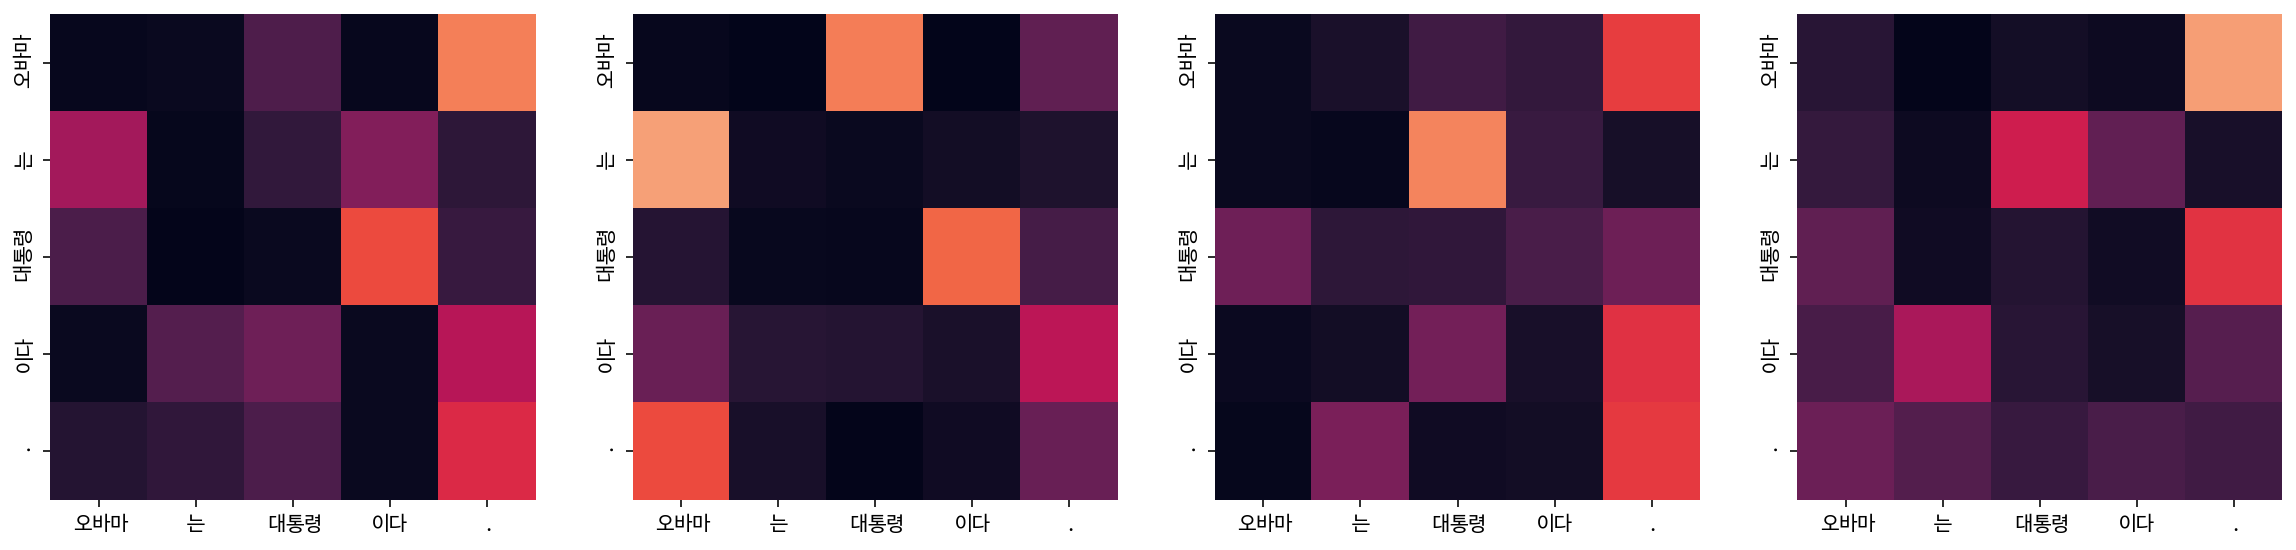

Encoder Layer 2


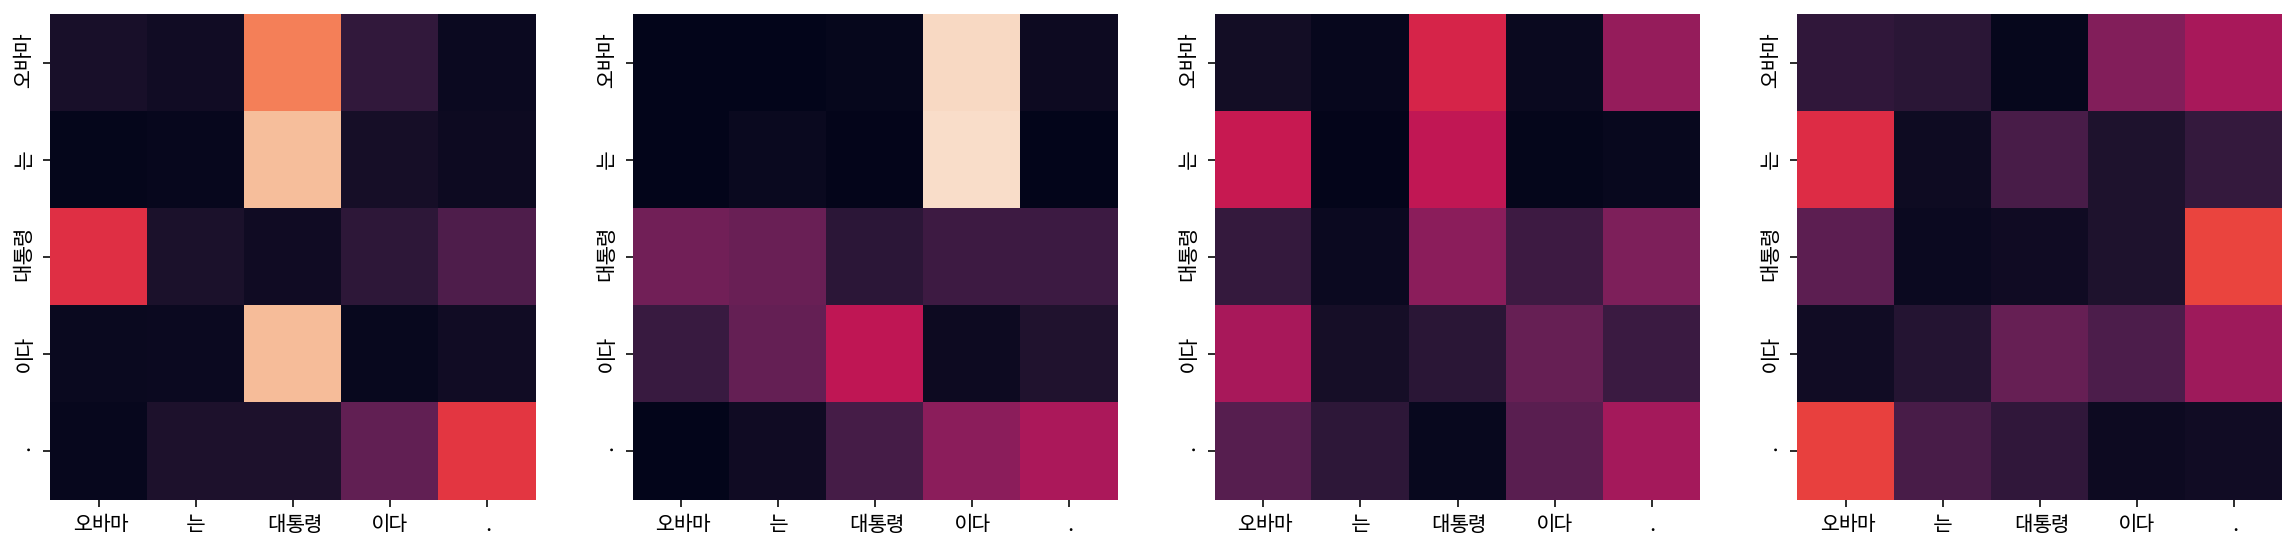

Decoder Self Layer 1


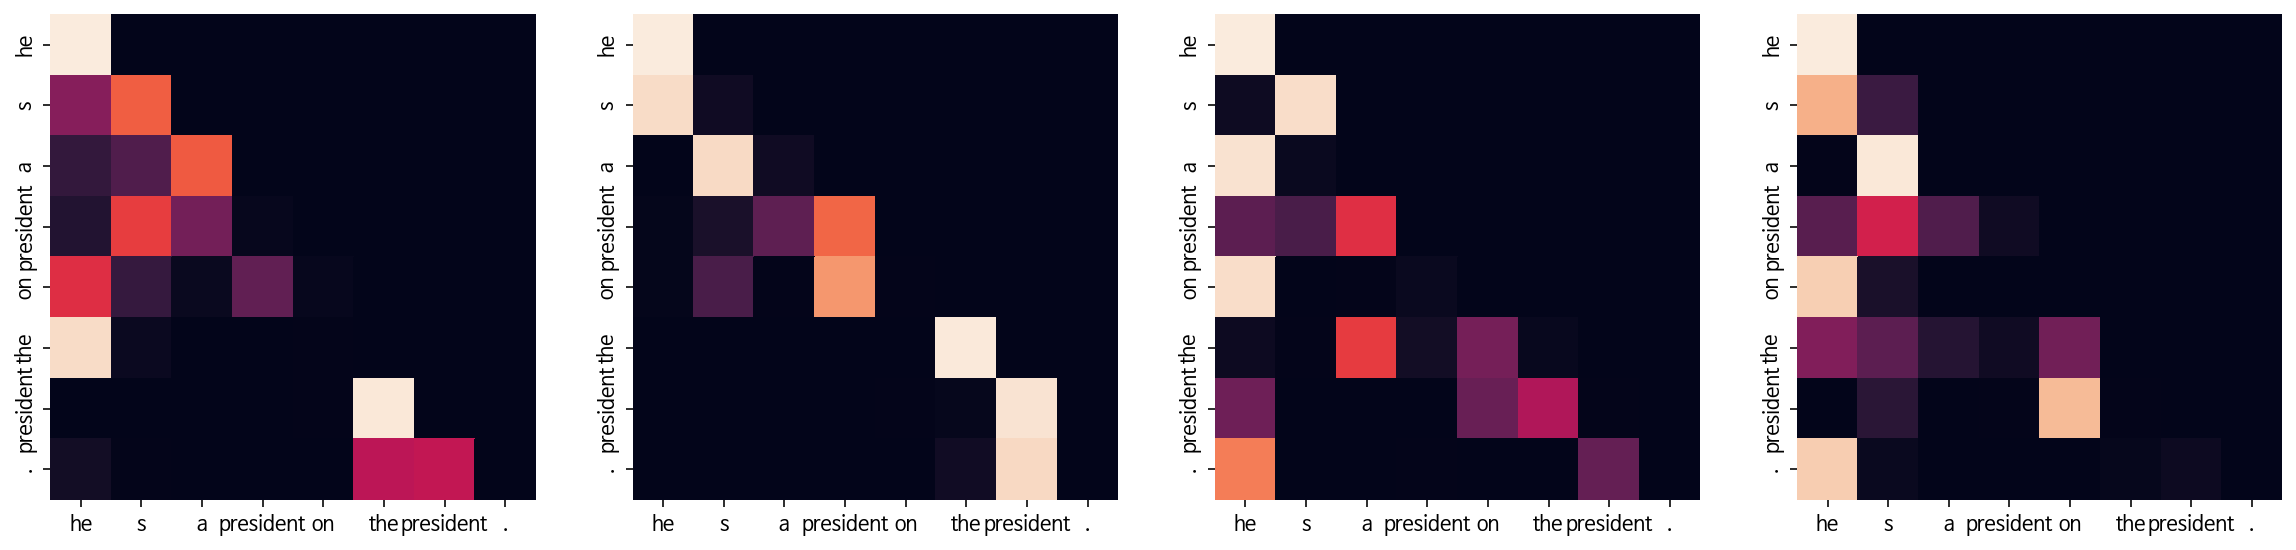

Decoder Src Layer 1


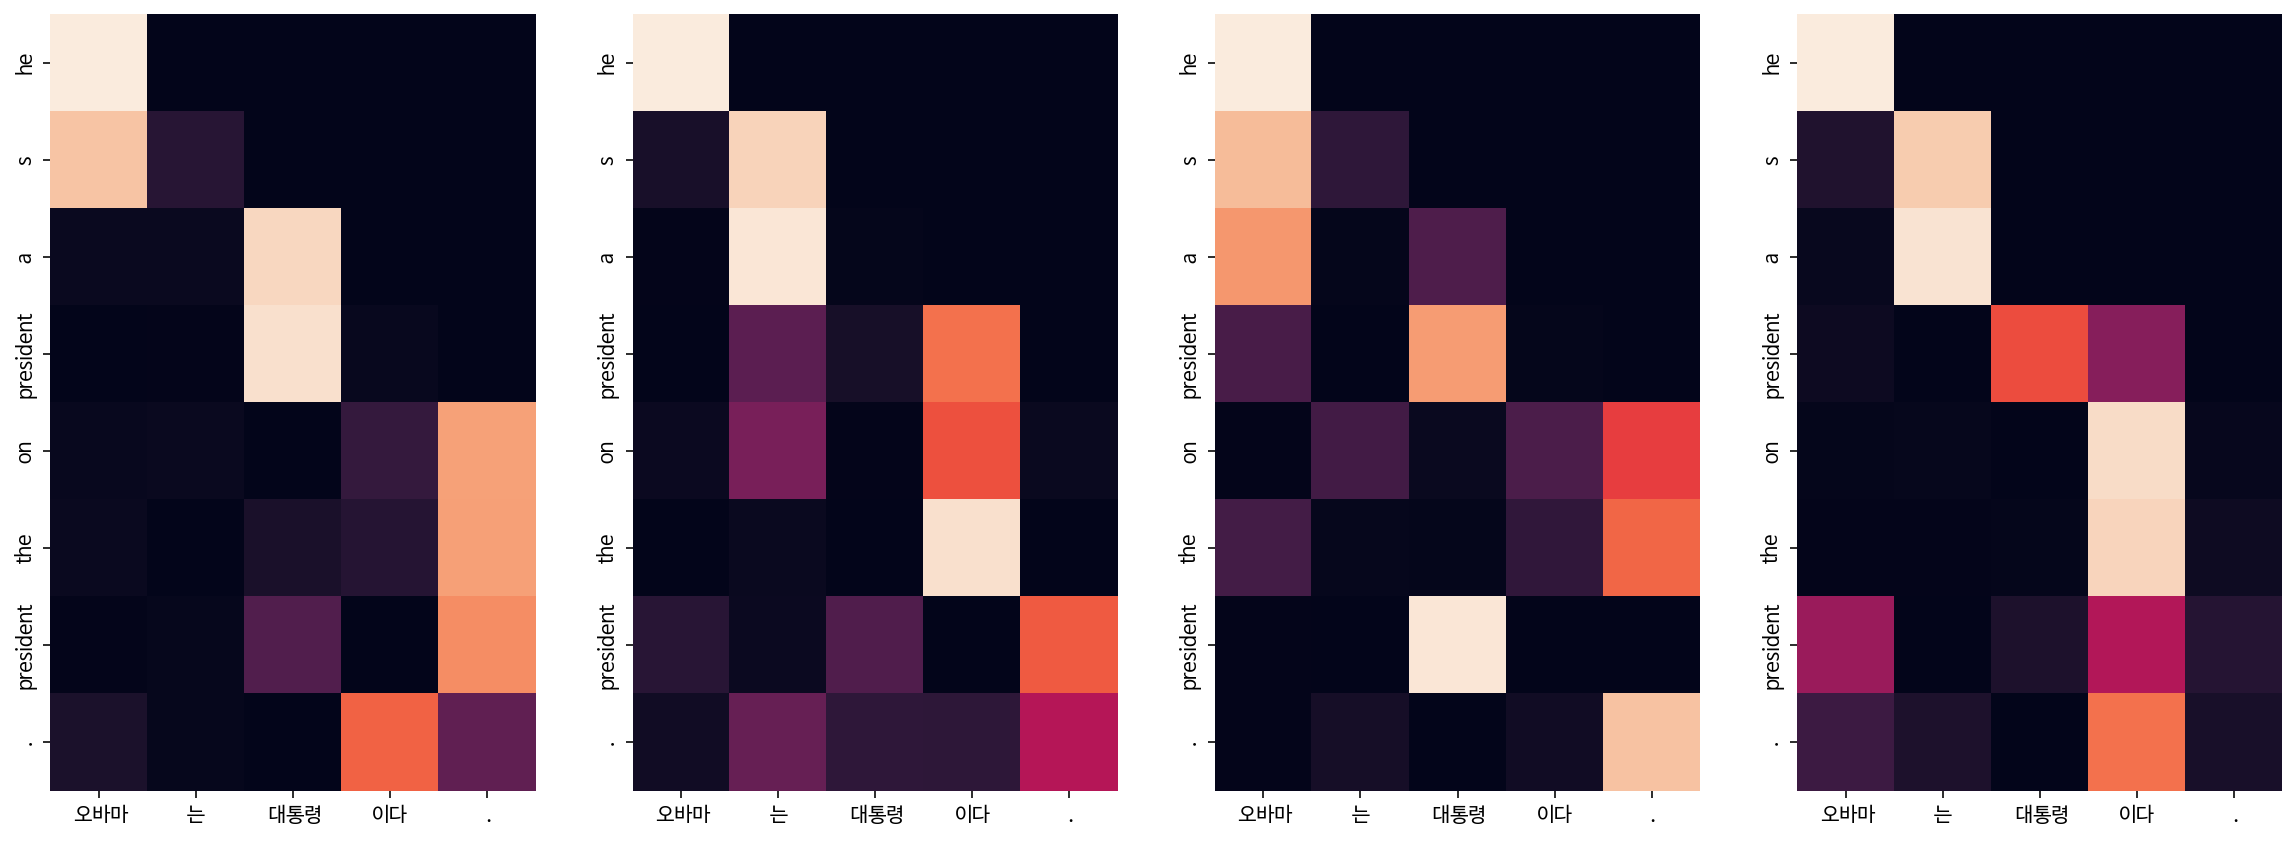

Decoder Self Layer 2


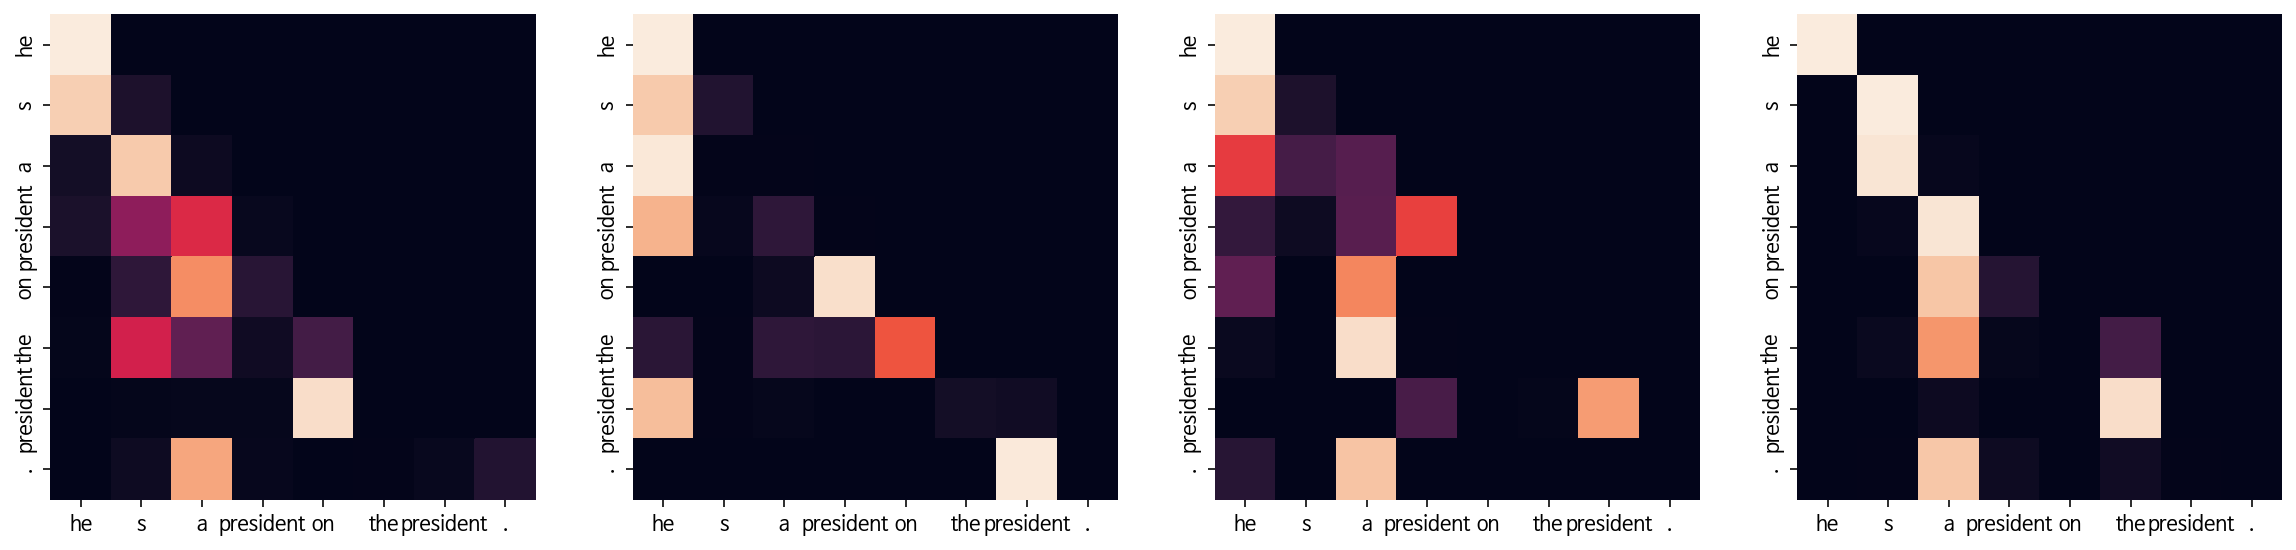

Decoder Src Layer 2


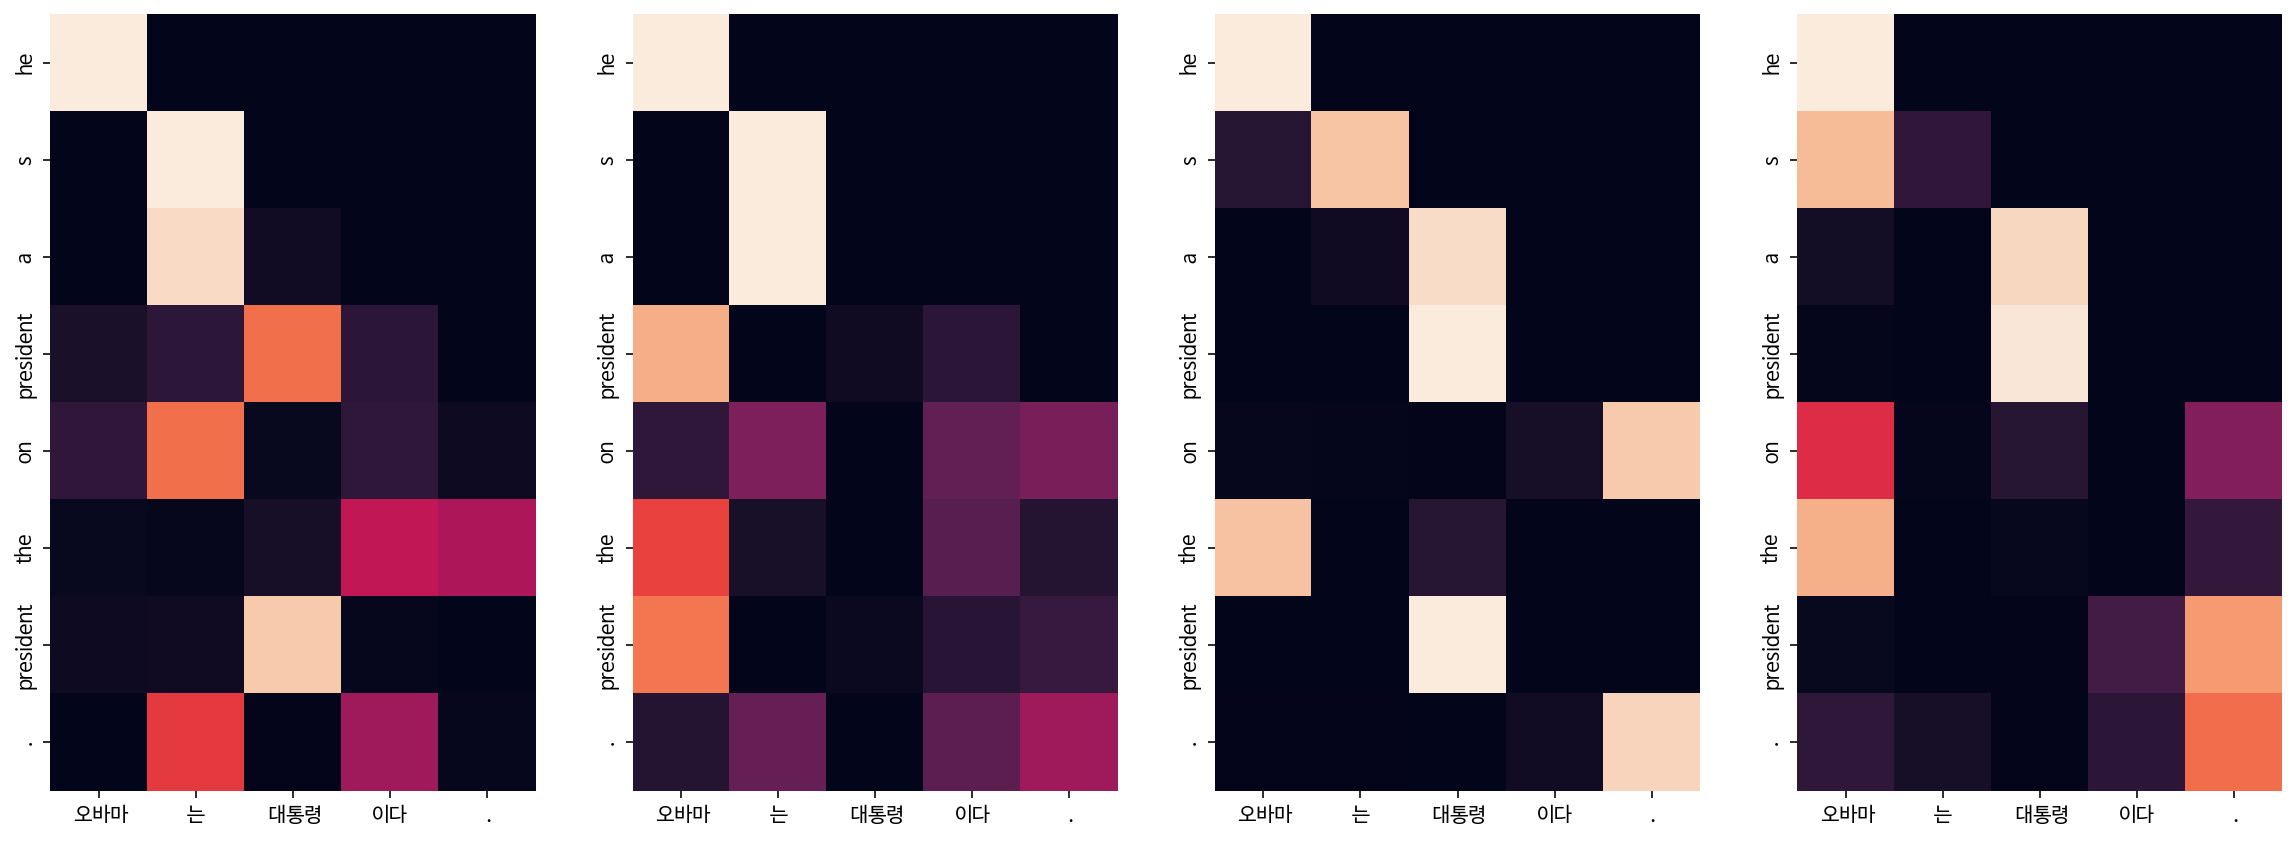

In [34]:
translate("Ïò§Î∞îÎßàÎäî ÎåÄÌÜµÎ†πÏù¥Îã§.", transformer,kor_tokenizer, eng_tokenizer, True)

Input: ÏãúÎØºÎì§ÏùÄ ÎèÑÏãú ÏÜçÏóê ÏÇ∞Îã§.
Predicted translation: they now rial in the big cities .
Encoder Layer 1


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9601 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9601 missing from current font.
  font.set_text(s, 0, flags=flags)


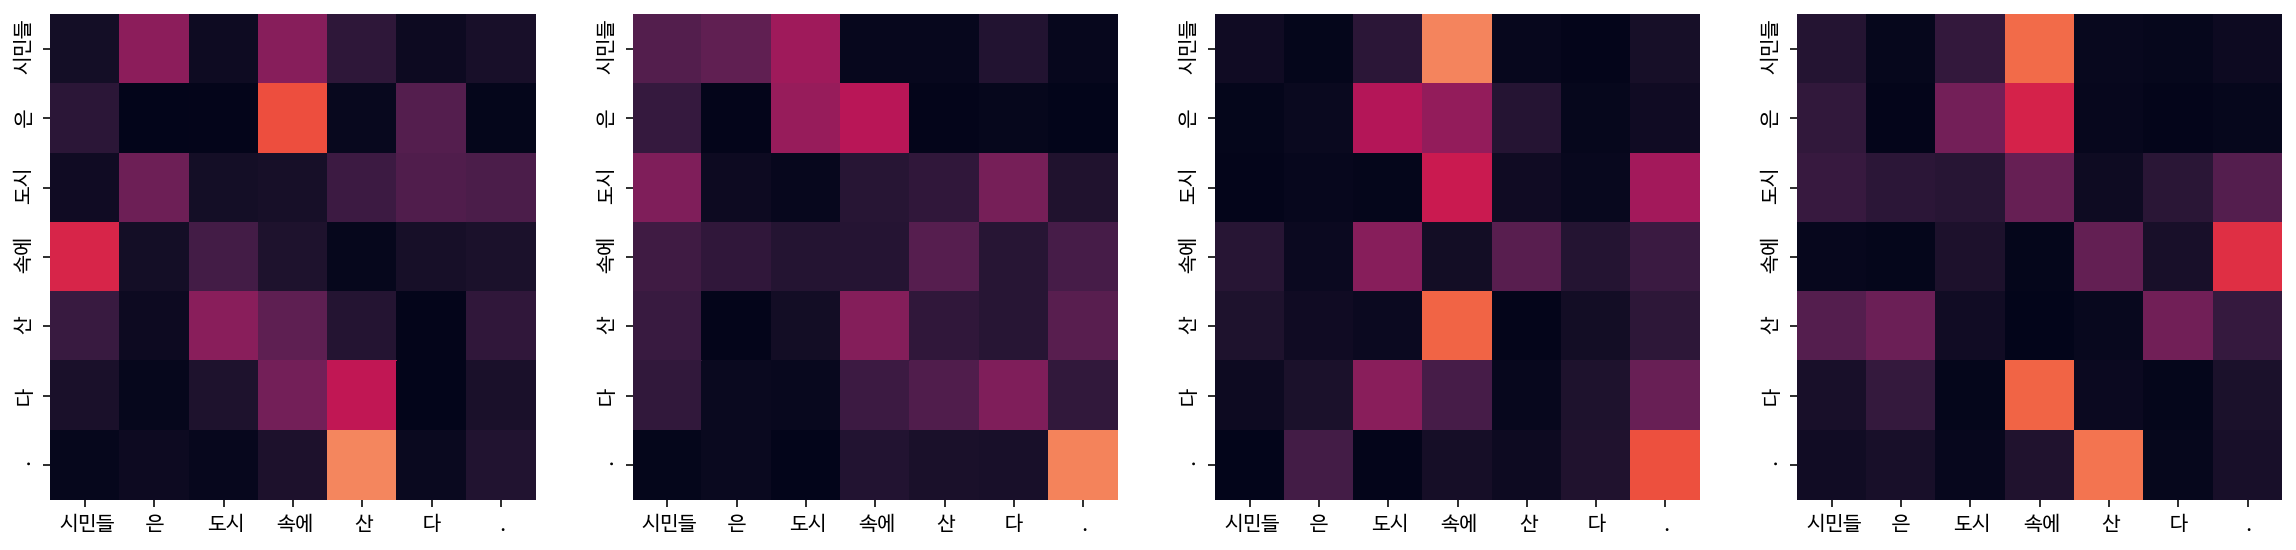

Encoder Layer 2


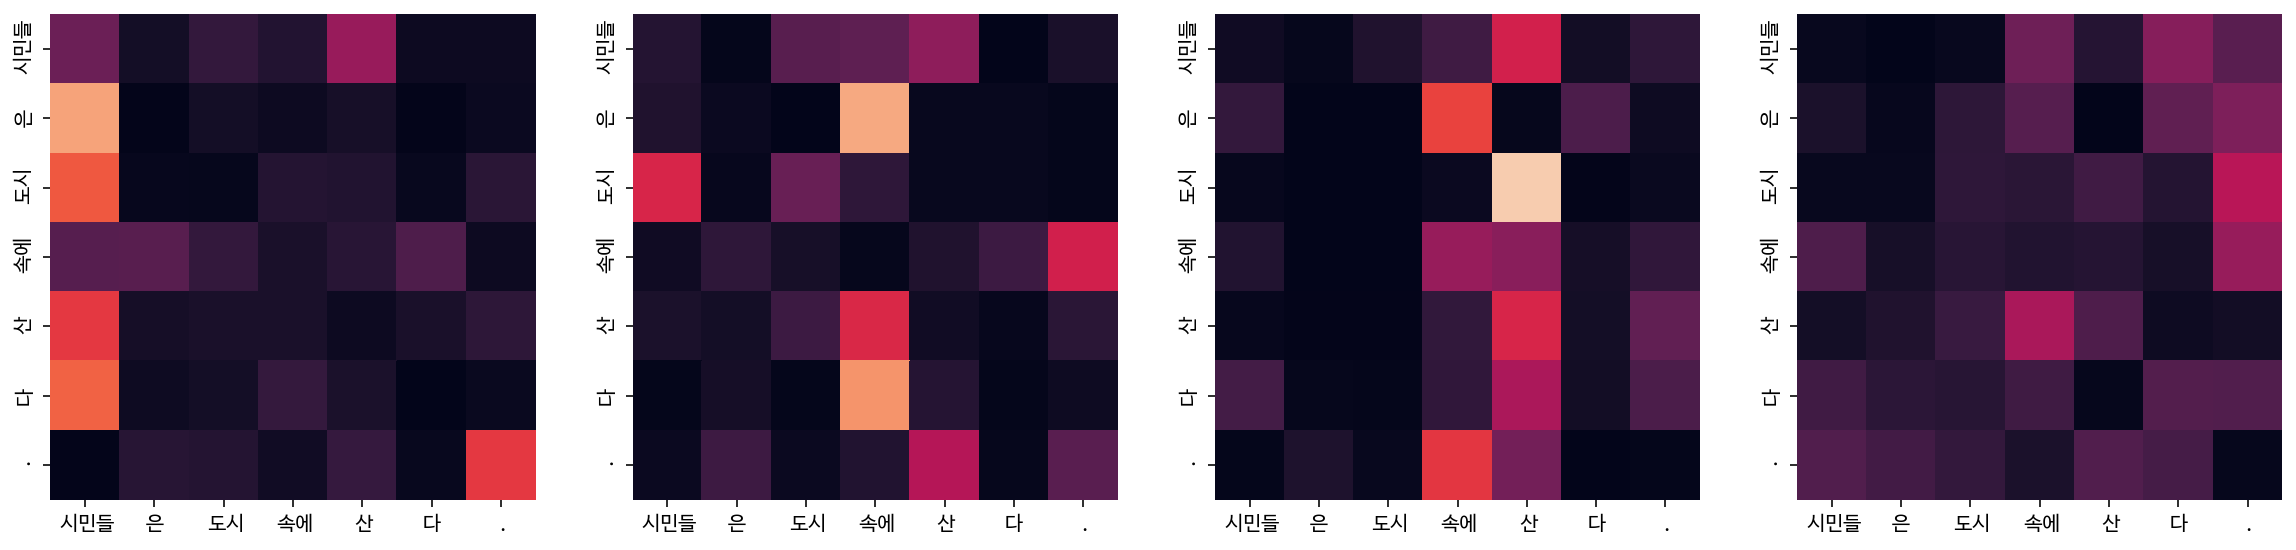

Decoder Self Layer 1


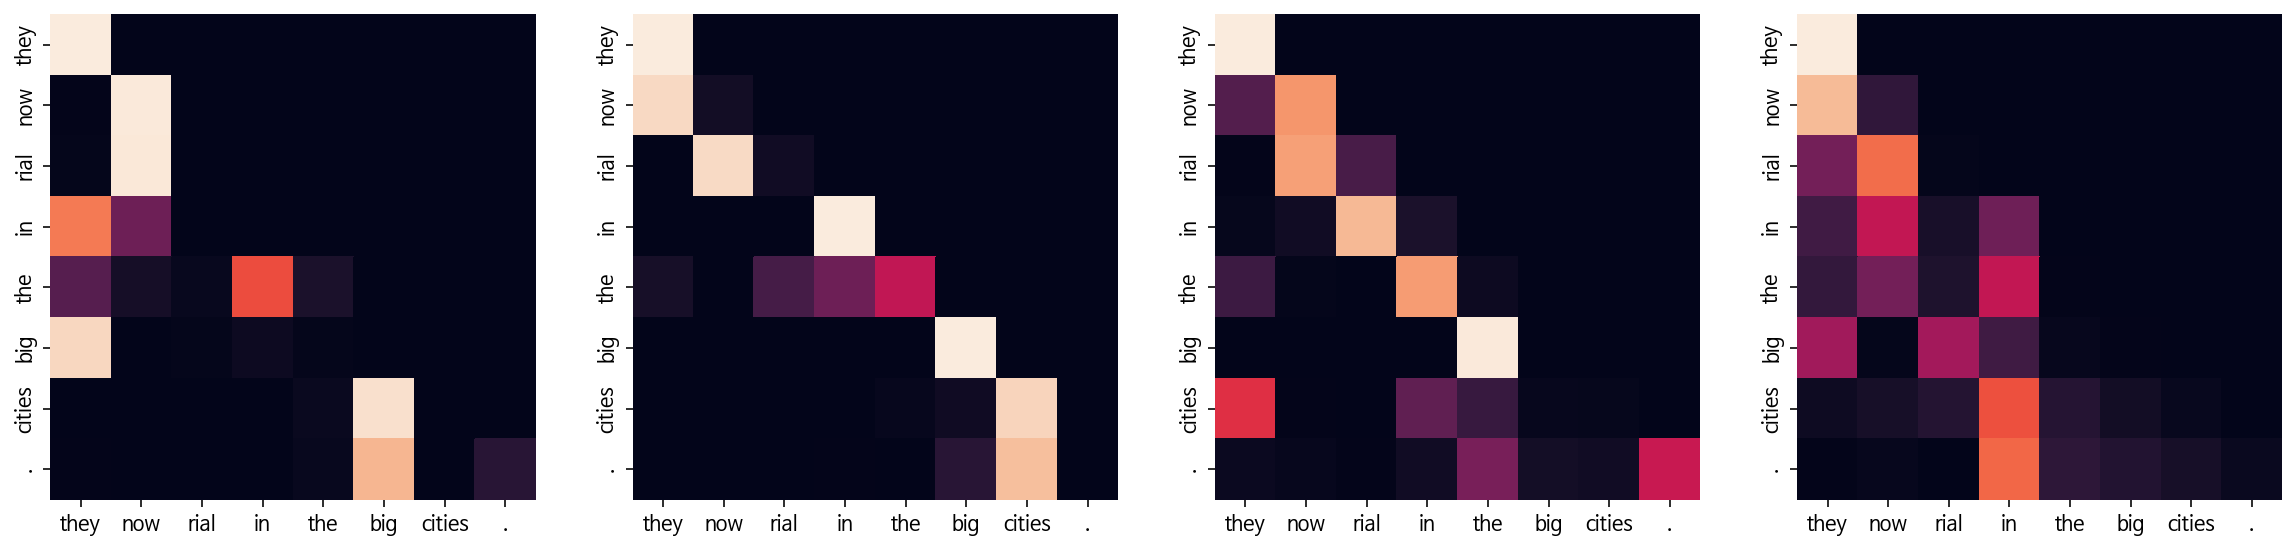

Decoder Src Layer 1


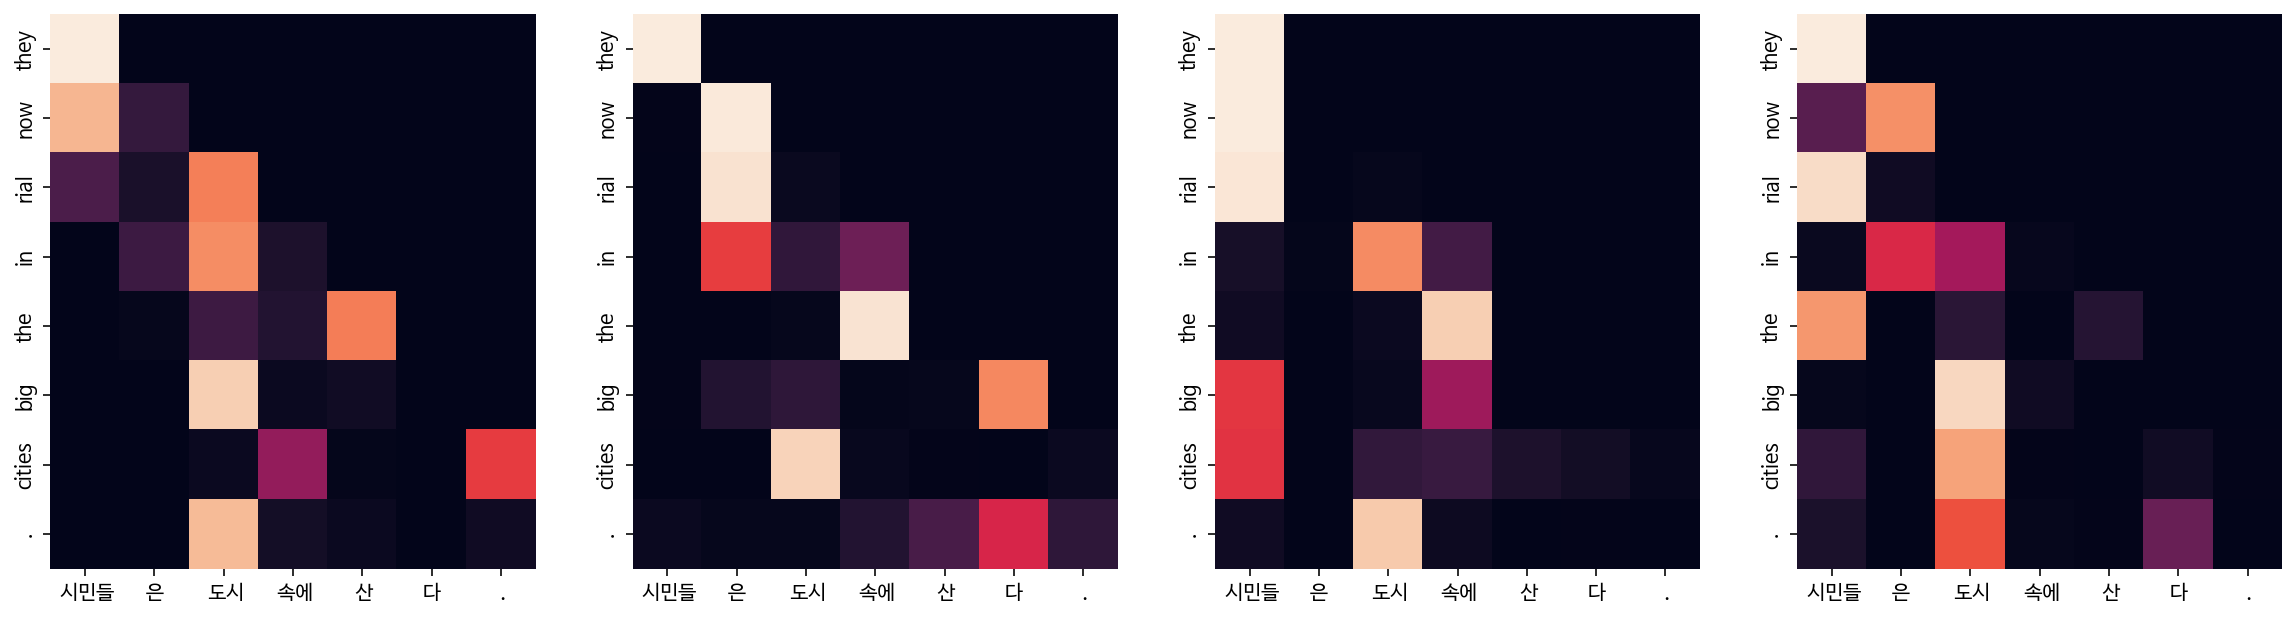

Decoder Self Layer 2


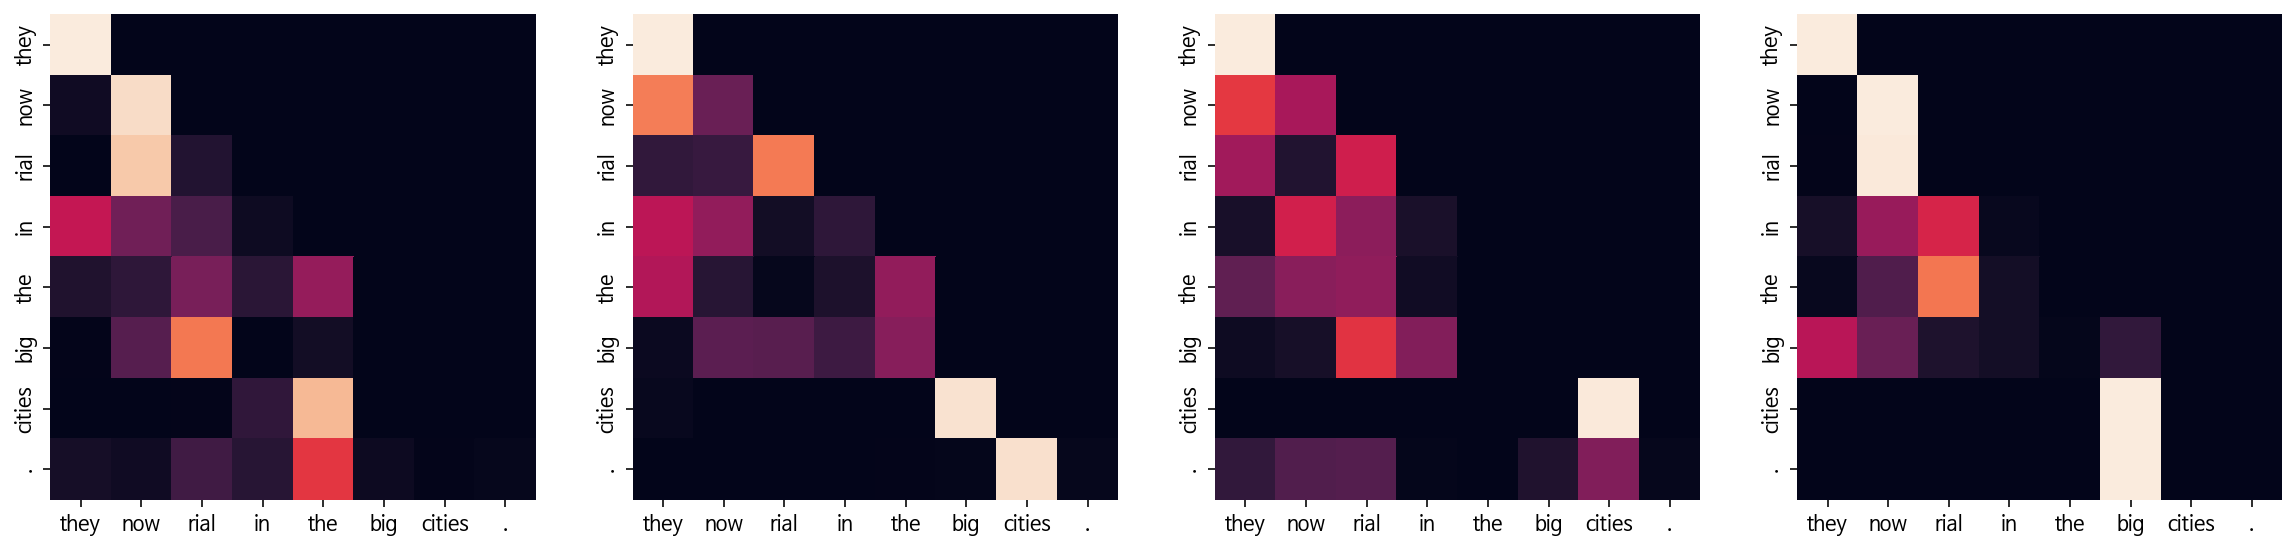

Decoder Src Layer 2


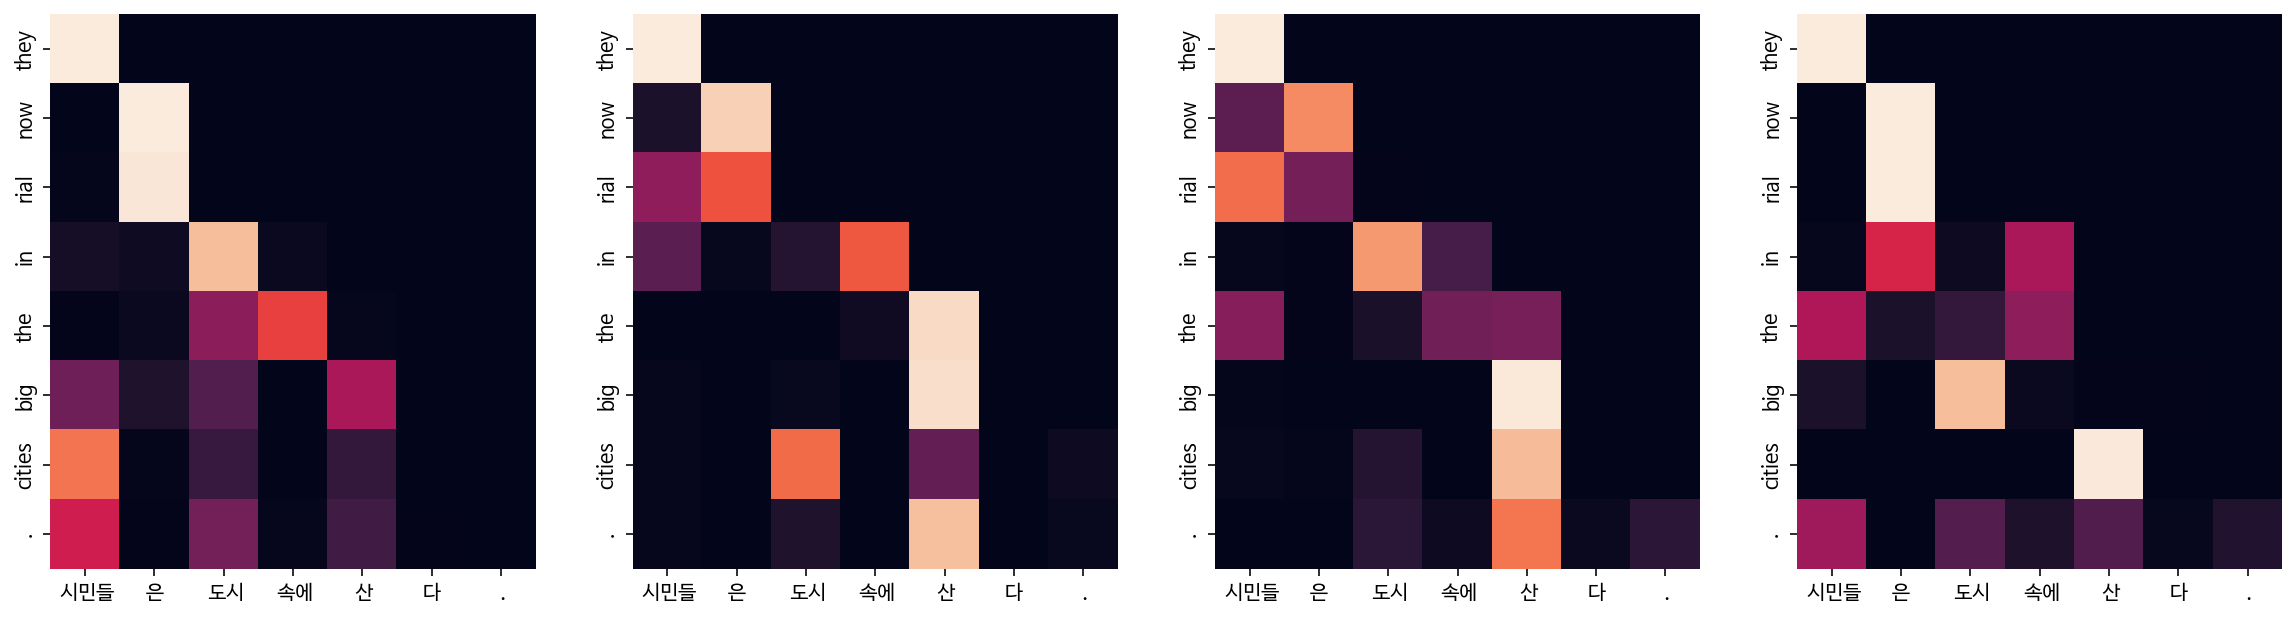

In [36]:
translate("ÏãúÎØºÎì§ÏùÄ ÎèÑÏãú ÏÜçÏóê ÏÇ∞Îã§.", transformer,kor_tokenizer, eng_tokenizer, True)

Input: Ïª§ÌîºÎäî ÌïÑÏöî ÏóÜÎã§.
Predicted translation: need to coffee
Encoder Layer 1


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9601 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9601 missing from current font.
  font.set_text(s, 0, flags=flags)


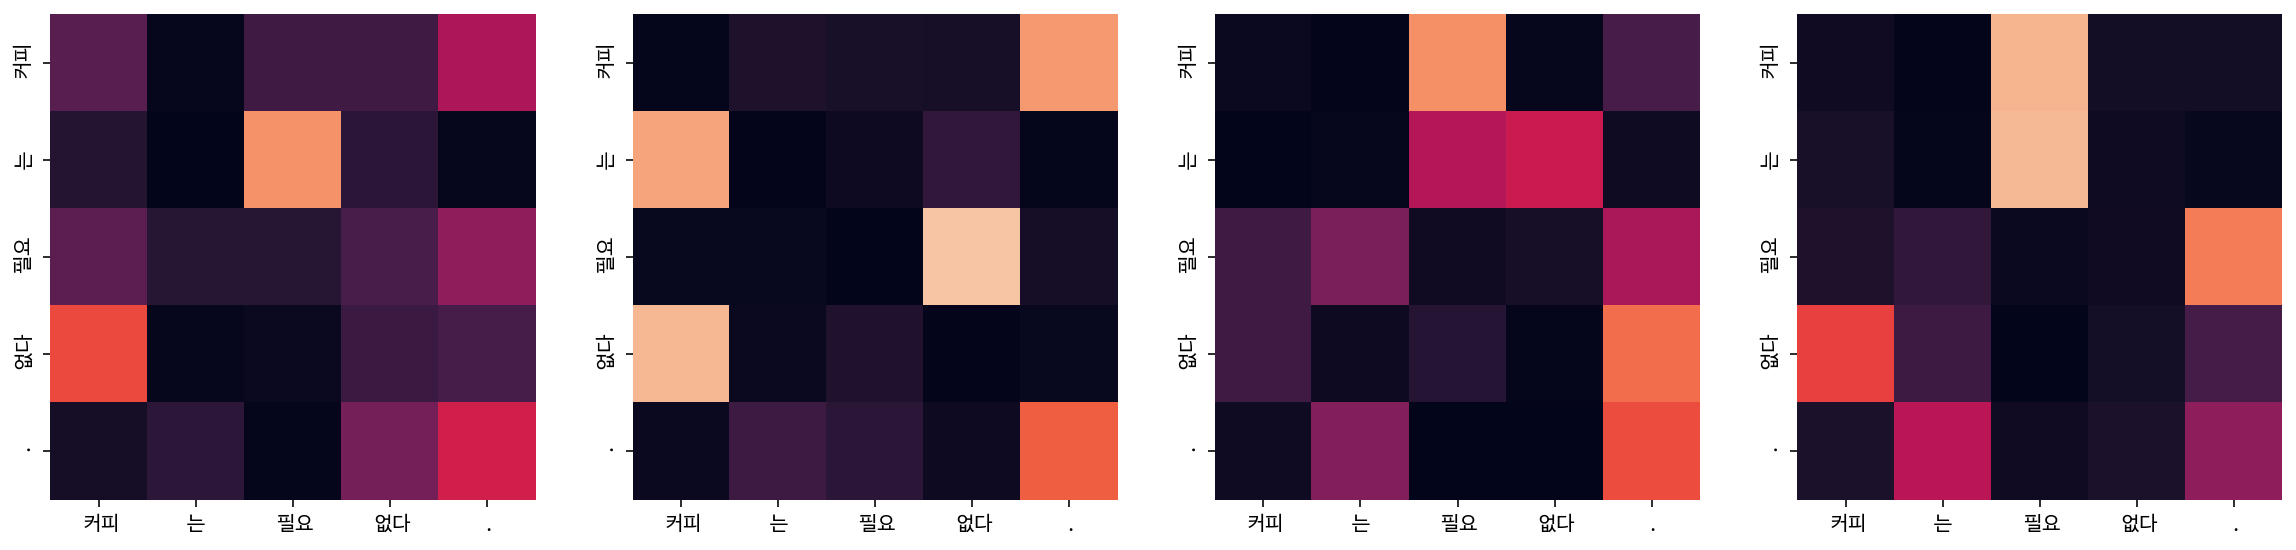

Encoder Layer 2


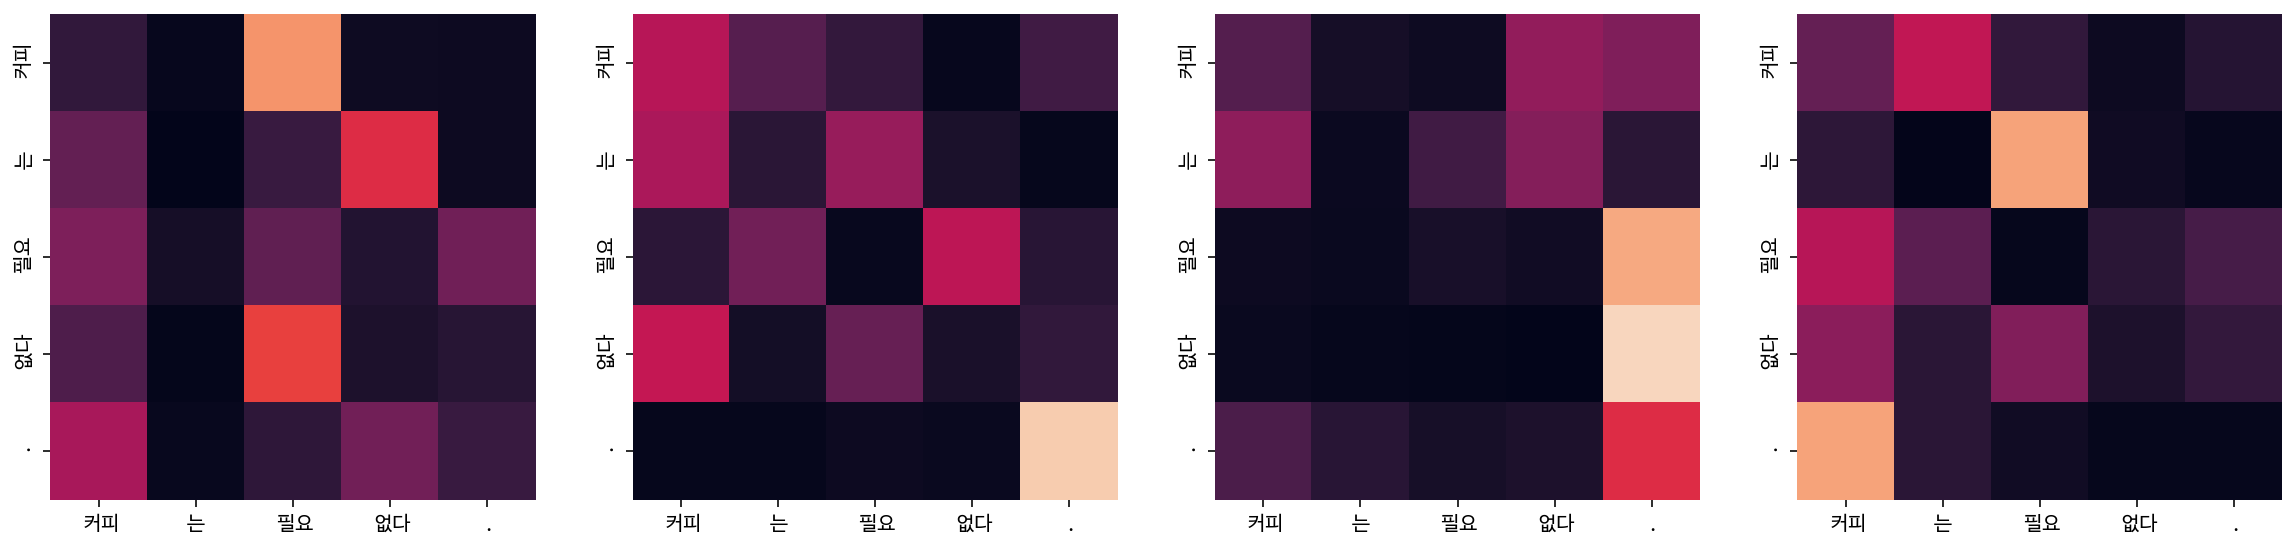

Decoder Self Layer 1


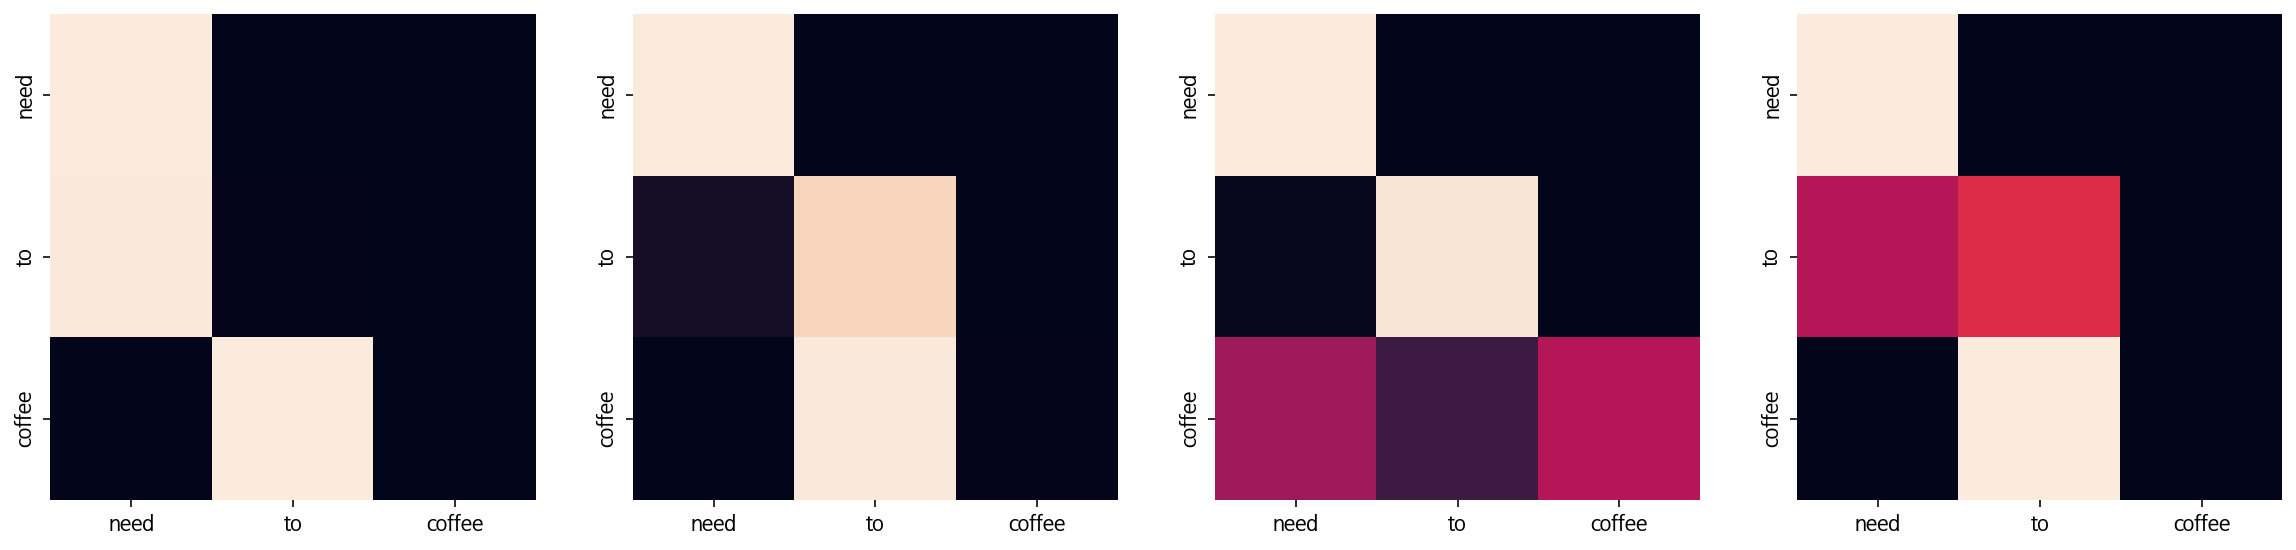

Decoder Src Layer 1


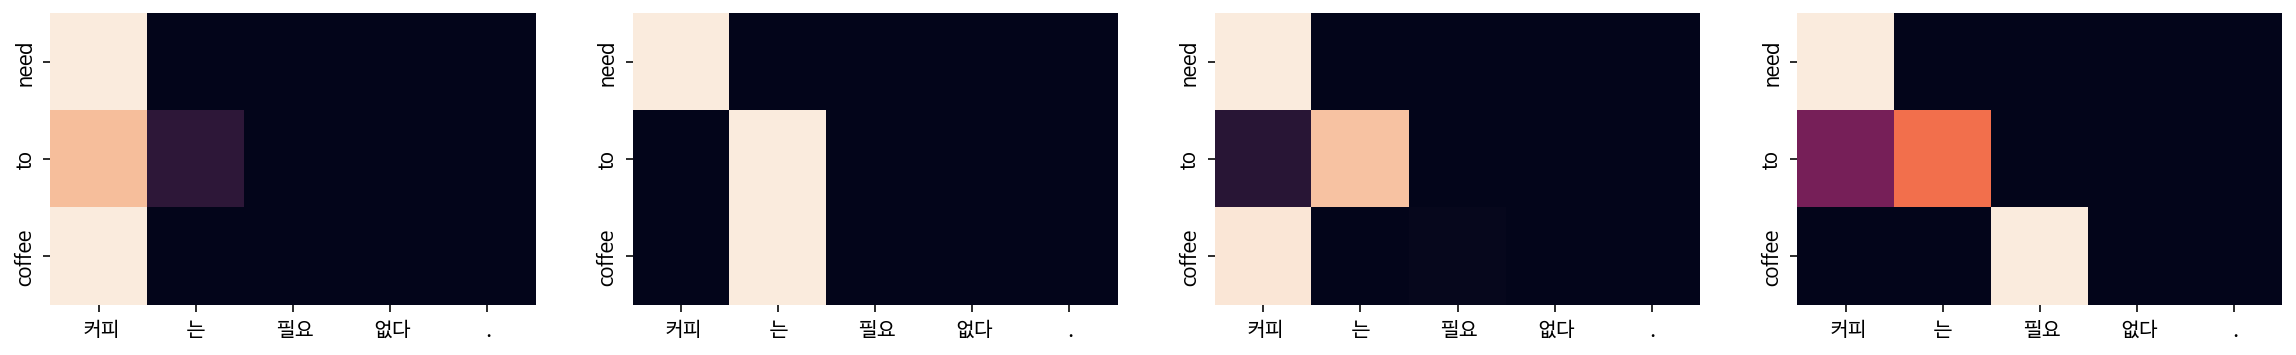

Decoder Self Layer 2


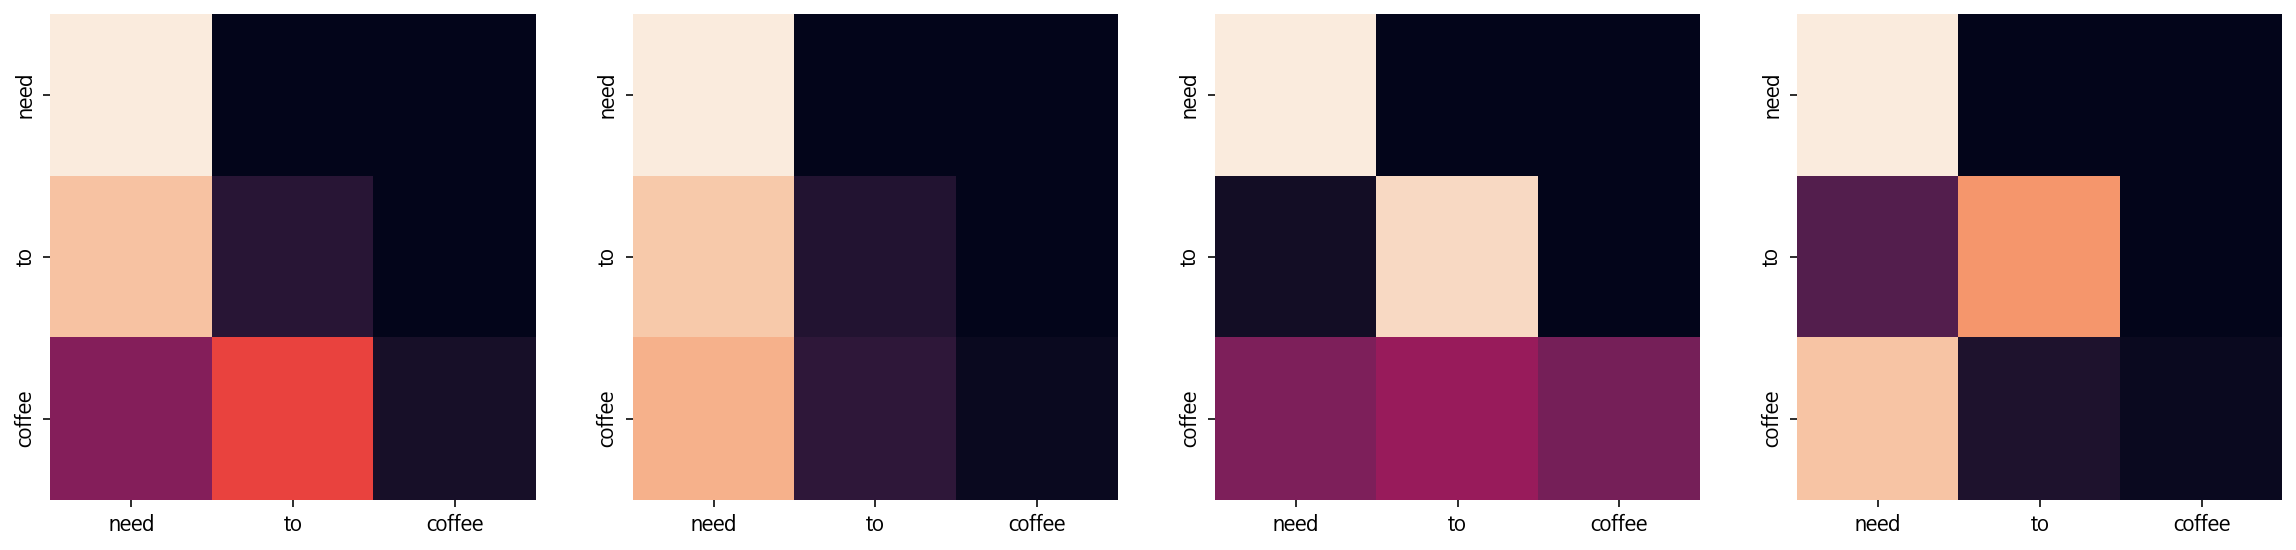

Decoder Src Layer 2


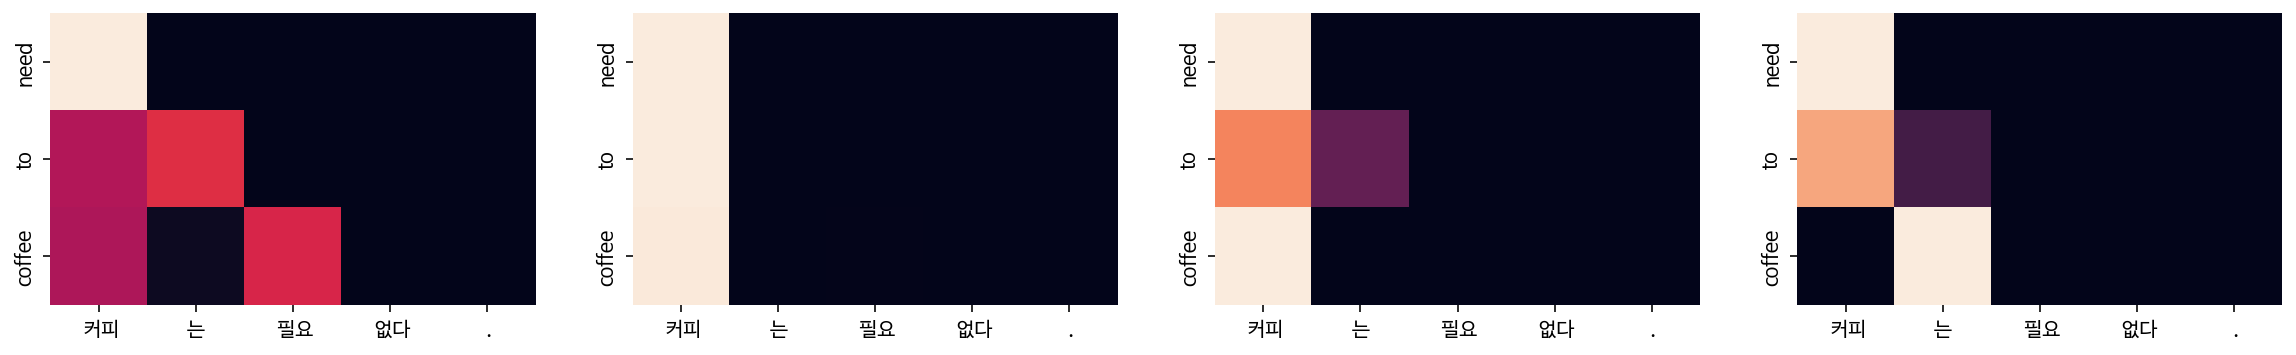

In [37]:
translate("Ïª§ÌîºÎäî ÌïÑÏöî ÏóÜÎã§.", transformer,kor_tokenizer, eng_tokenizer, True)

Input: ÏùºÍ≥± Î™ÖÏùò ÏÇ¨ÎßùÏûêÍ∞Ä Î∞úÏÉùÌñàÎã§.
Predicted translation: on sunday , seven others were injured .
Encoder Layer 1


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9601 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9601 missing from current font.
  font.set_text(s, 0, flags=flags)


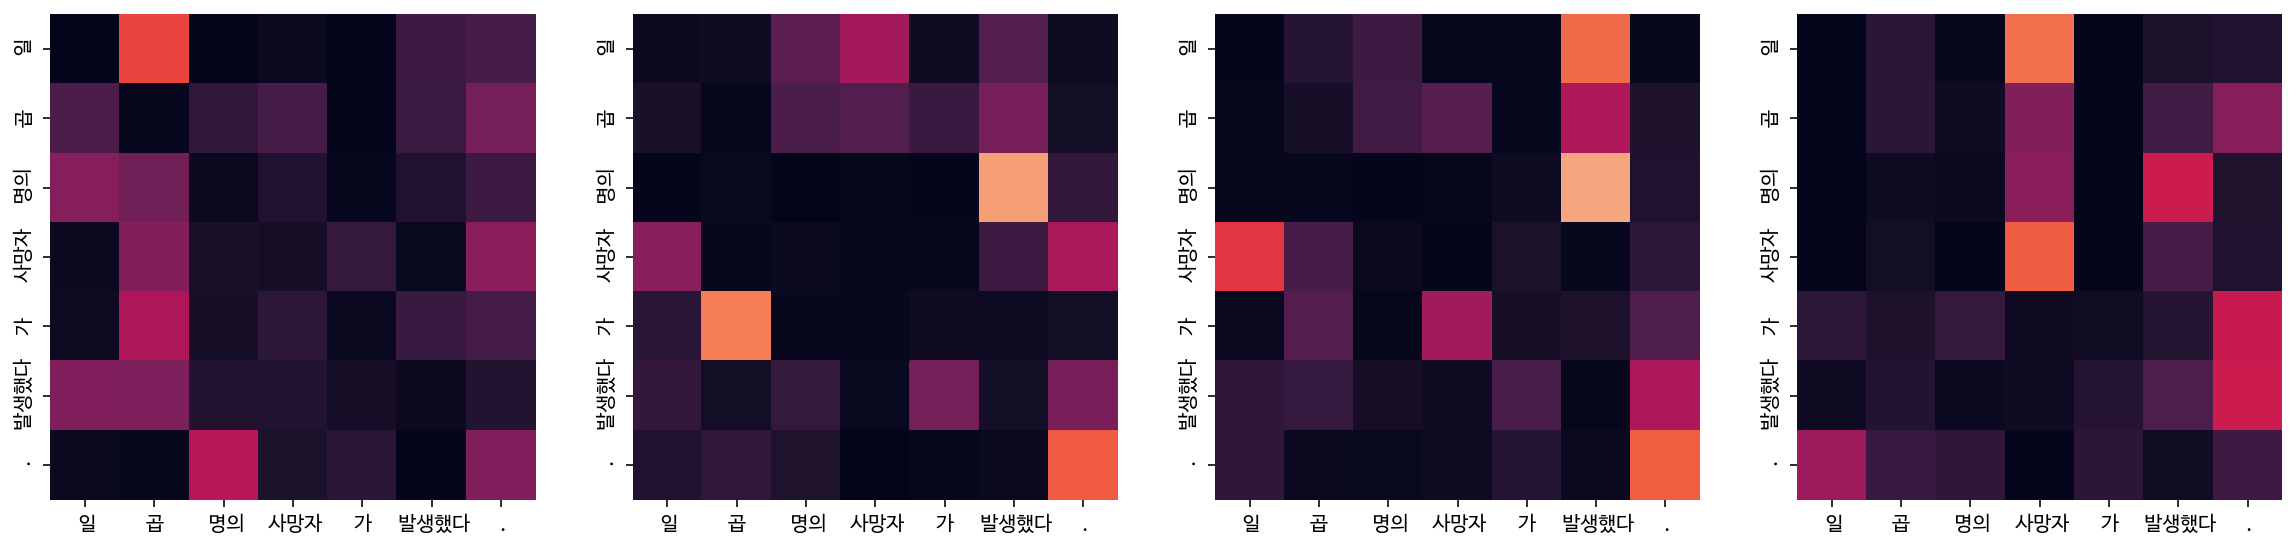

Encoder Layer 2


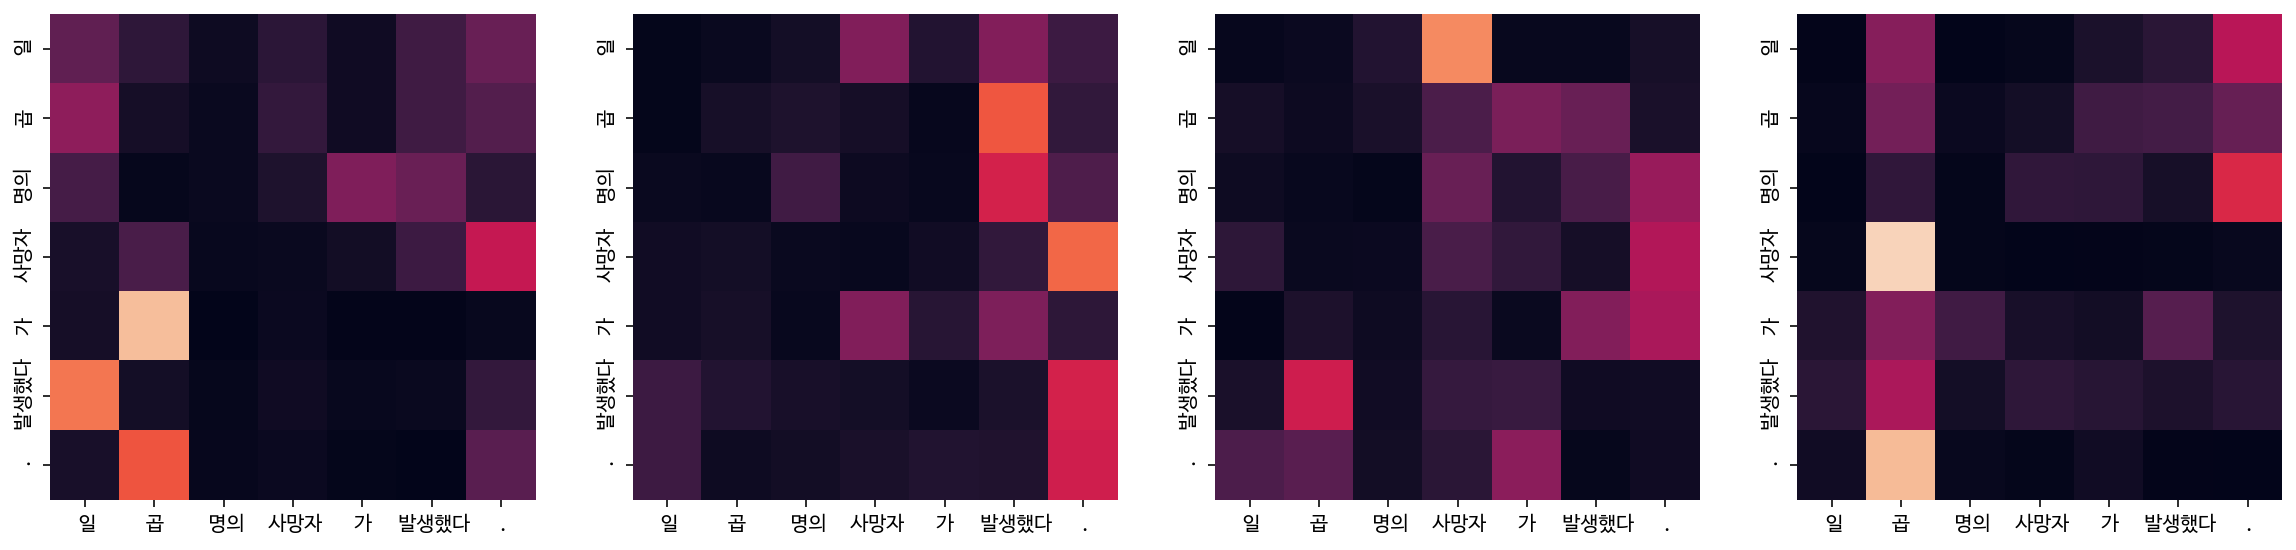

Decoder Self Layer 1


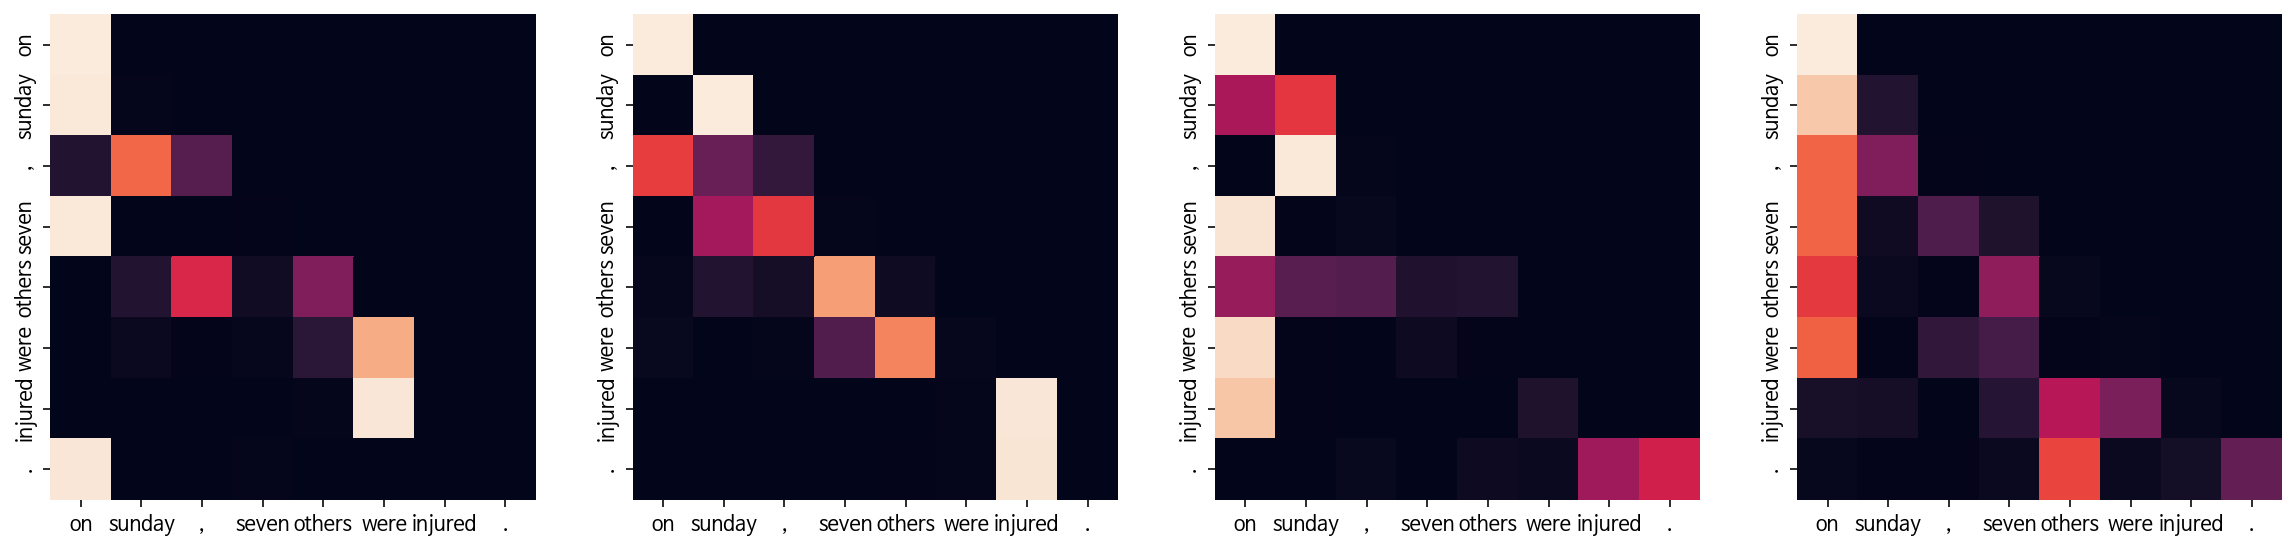

Decoder Src Layer 1


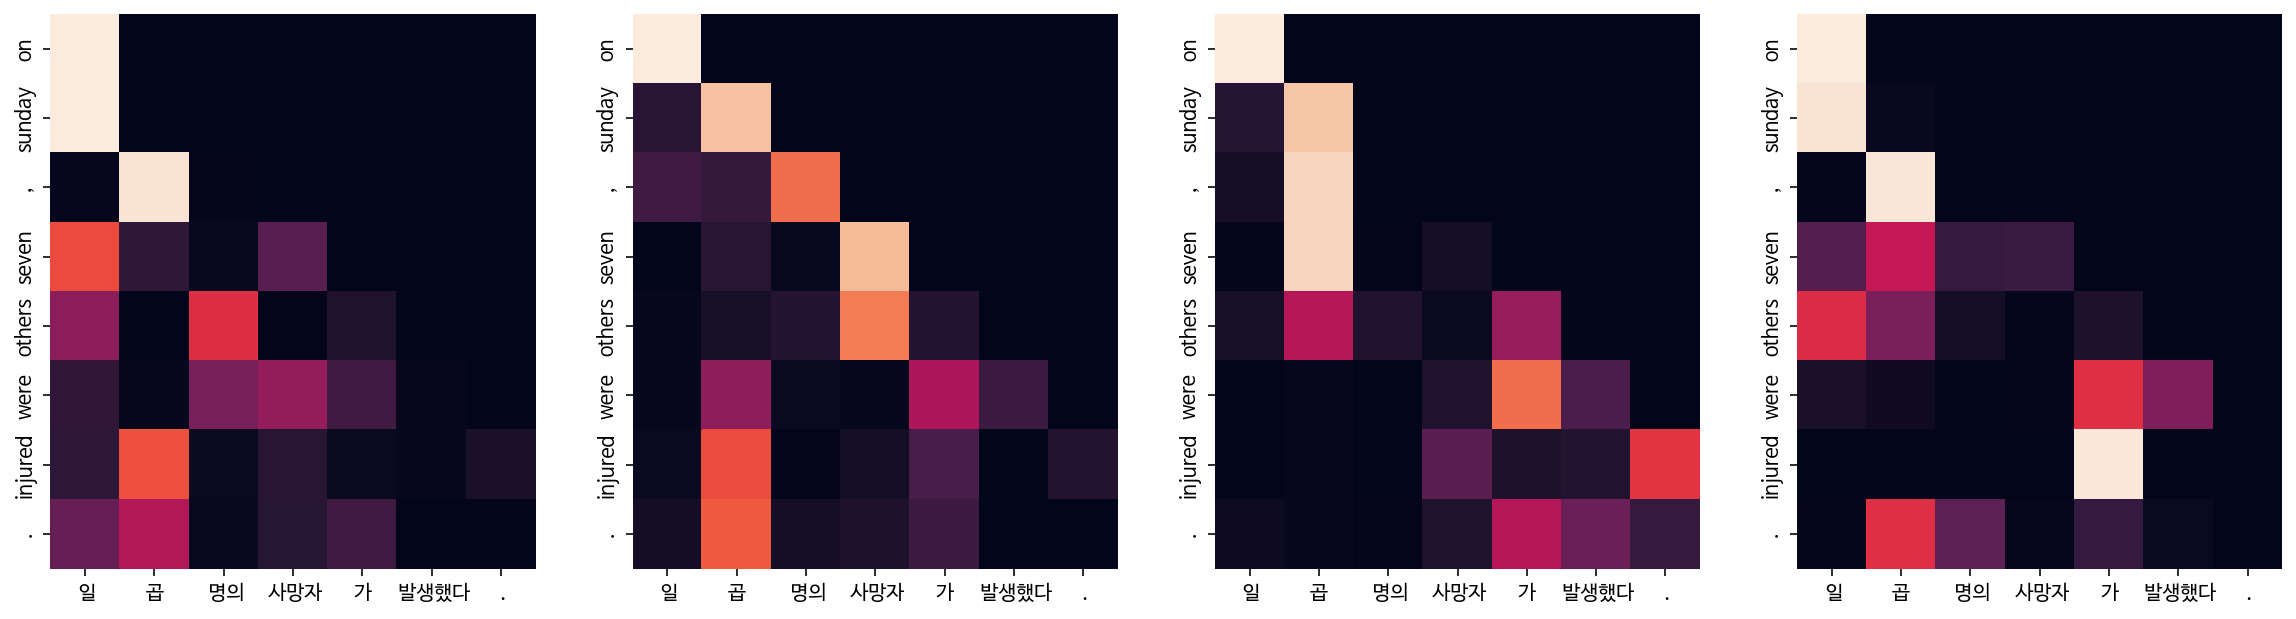

Decoder Self Layer 2


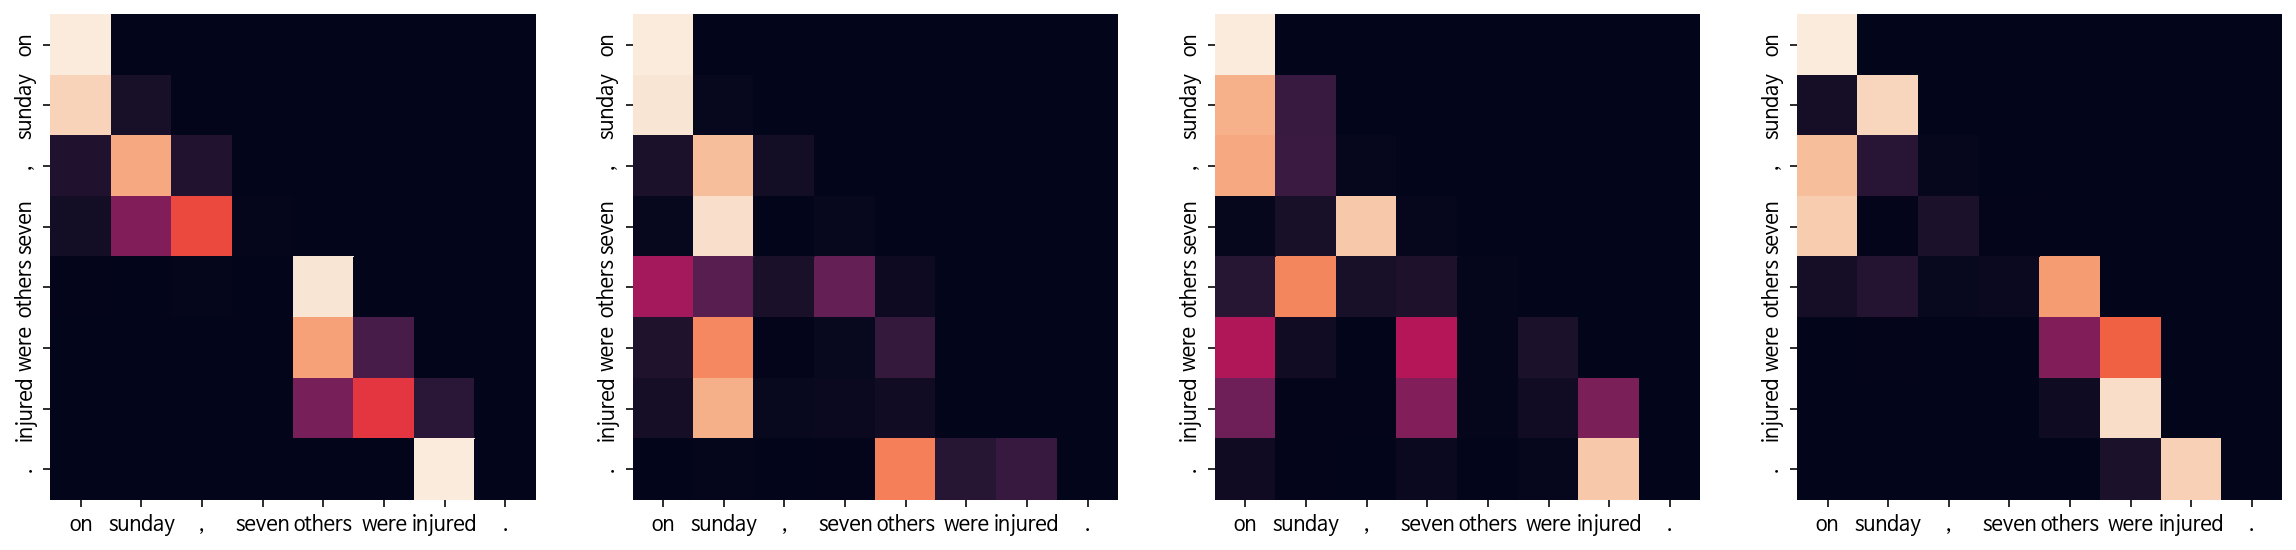

Decoder Src Layer 2


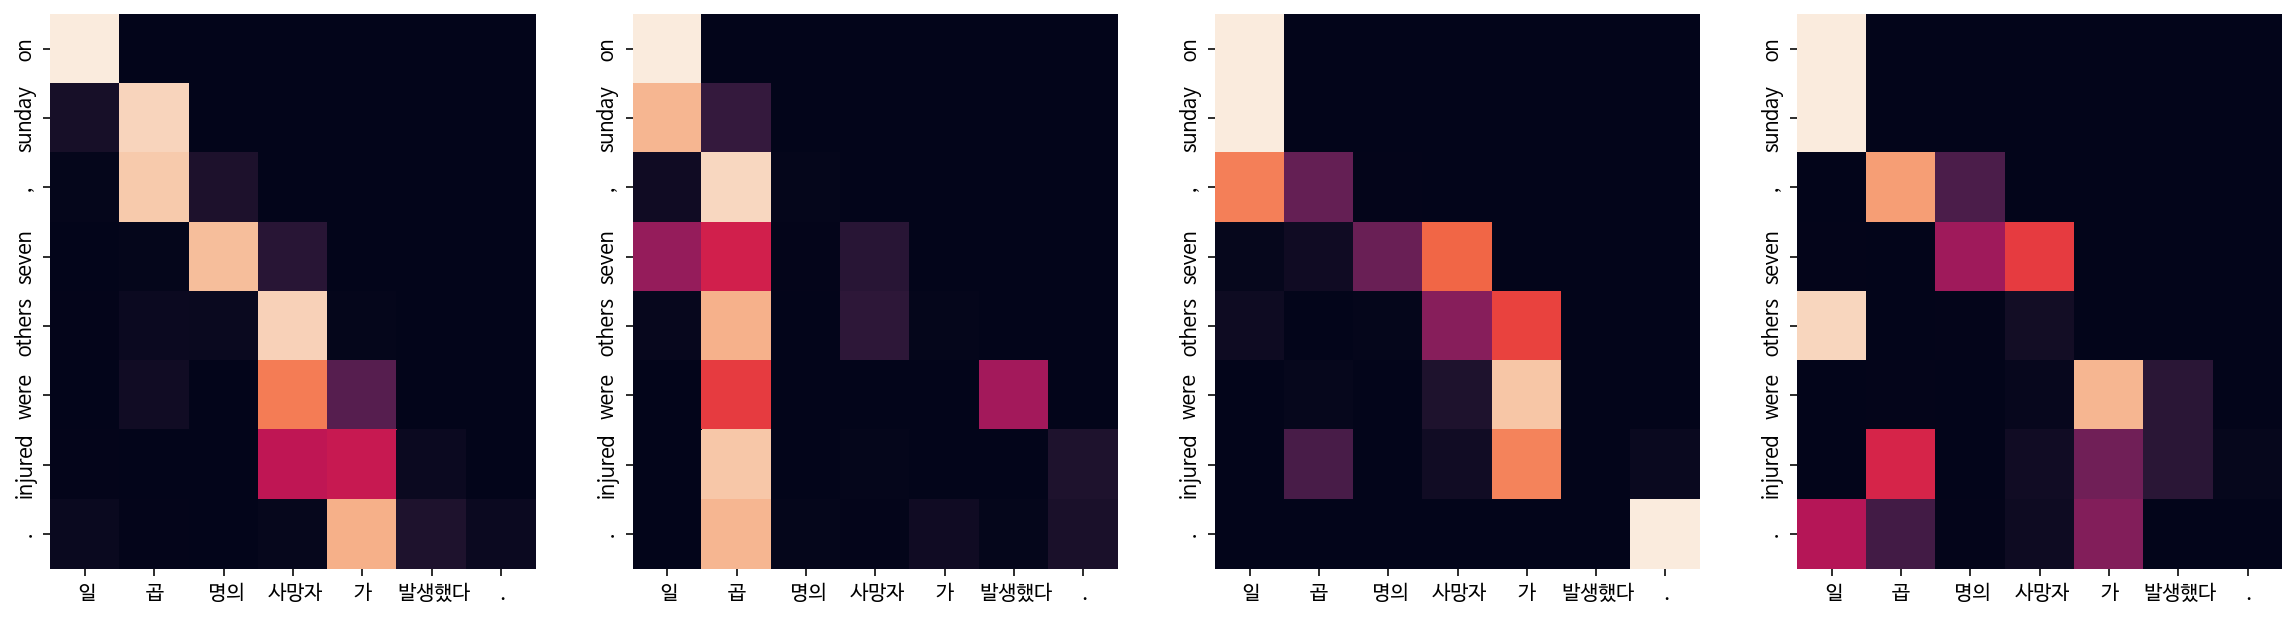

In [38]:
translate("ÏùºÍ≥± Î™ÖÏùò ÏÇ¨ÎßùÏûêÍ∞Ä Î∞úÏÉùÌñàÎã§.", transformer,kor_tokenizer, eng_tokenizer, True)

# **üåû ÌöåÍ≥†**
---

## **1) Í≤∞Í≥º**
> - Ïò§Î∞îÎßàÎäî ÎåÄÌÜµÎ†πÏù¥Îã§. ‚ñ∂ he s a president on the president .
> - ÏãúÎØºÎì§ÏùÄ ÎèÑÏãú ÏÜçÏóê ÏÇ∞Îã§. ‚ñ∂ they now rial in the big cities .
> - Ïª§ÌîºÎäî ÌïÑÏöî ÏóÜÎã§. ‚ñ∂ need to coffee
> - ÏùºÍ≥± Î™ÖÏùò ÏÇ¨ÎßùÏûêÍ∞Ä Î∞úÏÉùÌñàÎã§. ‚ñ∂ on sunday , seven others were injured .

-  `Transformer`Î•º ÏÇ¨Ïö©ÌïòÎ©¥ Îçî ÏÑ±Îä•Ïù¥ Ï¢ãÏùÑ Í±∞ÎùºÍ≥† ÏÉùÍ∞ÅÌñàÏßÄÎßå, ÏÉùÍ∞ÅÎ≥¥Îã§ Î≤àÏó≠Ïù¥ Ïûò ÎêòÏßÄ ÏïäÏïòÎã§.
- epochÏù¥ÎÇò layer Ïàò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º Î≥ÄÍ≤ΩÌïòÎ©¥ Îçî ÏÑ±Îä•Ïù¥ ÎÇòÏïÑÏ°åÏùÑÍπå ÌïòÎäî ÏÉùÍ∞ÅÏù¥ Îì§ÏßÄÎßå Ï¢ãÏùÄ Í≤∞Í≥ºÎ•º ÏñªÍ∏∞Îäî ÏâΩÏßÄ ÏïäÏùÑ Í≤É Í∞ôÎã§.

[AttentionÎßåÏùÑ ÏÇ¨Ïö©Ìïú Í≤∞Í≥º]
> - Ïò§Î∞îÎßàÎäî ÎåÄÌÜµÎ†πÏù¥Îã§. ‚ñ∂ obama is a lot of winning .
> - ÏãúÎØºÎì§ÏùÄ ÎèÑÏãú ÏÜçÏóê ÏÇ∞Îã§. ‚ñ∂ they are in the city .
> - Ïª§ÌîºÎäî ÌïÑÏöî ÏóÜÎã§. ‚ñ∂ but it s not a cadillac , but it s not a cadillac , but it s not a cadillac , but it s not a cadillac , but it s not a cadillac , but it s not a
> - ÏùºÍ≥± Î™ÖÏùò ÏÇ¨ÎßùÏûêÍ∞Ä Î∞úÏÉùÌñàÎã§. ‚ñ∂ seven people were killed .

- TransformerÎ•º ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏïòÏùÑ ÎïåÏôÄ Í≤∞Í≥ºÍ∞Ä ÌÅ∞ Ï∞®Ïù¥Í∞Ä ÏóÜÎã§.
- Ï£ºÏöî ÌÇ§ÏõåÎìúÎäî Ïûò Ïû°ÏïÑÎÇ¥Îäî Í≤É Í∞ôÏúºÎÇò Ï†ïÌôïÌïòÍ≤å Î≤àÏó≠Ïù¥ ÎêòÏßÄ ÏïäÎäîÎã§.

## **2) ÌõÑÍ∏∞**
- Îã§ÏñëÌïú ÏãúÎèÑÎ•º Ìï¥Î≥¥ÏßÄ ÏïäÏïÑÏÑú Í∑∏Îü∞Í∞Ä, Í≤∞Í≥ºÍ∞Ä ÏïÑÏâΩÍ≤å ÎÇòÏôîÎã§.
- `Transformer`Îäî Ïó¨Ï†ÑÌûà Ïñ¥Î†µÎã§... Í≥ÑÏÜçÌï¥ÏÑú Í≥µÎ∂ÄÎ•º Ìï¥ÏÑú ÎÇ¥Í≤ÉÏúºÎ°ú ÎßåÎì§Ïñ¥Î¥êÏïºÍ≤†Îã§...!!!!